In [1]:
from yugiquery import *

header("Cards")

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Execution started 03/07/2023 04:01 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load previous data](#Load-previous-data)
    *   [2.2  Generate changelog](#Generate-changelog)
    *   [2.3  Save data](#Save-data)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Full data](#Full-data)
    *   [3.2  Card types](#Card-types)
    *   [3.3  Monsters](#Monsters)
        *   [3.3.1  Attributes](#Attributes)
        *   [3.3.2  Primary types](#Primary-types)
            *   [3.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [3.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [3.3.2.3  By attribute](#By-attribute)
        *   [3.3.3  Secondary types](#Secondary-types)
            *   [3.3.3.1  By attribute](#By-attribute)
            *   [3.3.3.2  By secondary type](#By-secondary-type)
        *   [3.3.4  Monster types](#Monster-types)
            *   [3.3.4.1  By Attribute](#By-Attribute)
            *   [3.3.4.2  By primary type](#By-primary-type)
            *   [3.3.4.3  By secondary type](#By-secondary-type)
        *   [3.3.5  Effect type](#Effect-type)
        *   [3.3.6  ATK](#ATK)
        *   [3.3.7  DEF](#DEF)
        *   [3.3.8  Level/Rank](#Level/Rank)
            *   [3.3.8.1  ATK statistics](#ATK-statistics)
            *   [3.3.8.2  DEF statistics](#DEF-statistics)
        *   [3.3.9  Pendulum scale](#Pendulum-scale)
            *   [3.3.9.1  ATK statistics](#ATK-statistics)
            *   [3.3.9.2  DEF statistics](#DEF-statistics)
            *   [3.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [3.3.10  Link](#Link)
            *   [3.3.10.1  ATK statistics](#ATK-statistics)
        *   [3.3.11  Link Arrows](#Link-Arrows)
            *   [3.3.11.1  By combination](#By-combination)
            *   [3.3.11.2  By unique](#By-unique)
            *   [3.3.11.3  By link](#By-link)
    *   [3.4  Spell & Trap](#Spell-&-Trap)
        *   [3.4.1  Properties](#Properties)
        *   [3.4.2  Effect type](#Effect-type)
            *   [3.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [3.5  Archseries](#Archseries)
        *   [3.5.1  By card type](#By-card-type)
        *   [3.5.2  By primary type](#By-primary-type)
        *   [3.5.3  By secondary type](#By-secondary-type)
        *   [3.5.4  By monster type](#By-monster-type)
        *   [3.5.5  By property](#By-property)
    *   [3.6  Artworks](#Artworks)
        *   [3.6.1  By card type](#By-card-type)
        *   [3.6.2  By primary type](#By-primary-type)
    *   [3.7  Errata](#Errata)
        *   [3.7.1  By card type](#By-card-type)
        *   [3.7.2  By primary type](#By-primary-type)
        *   [3.7.3  By artwork](#By-artwork)
    *   [3.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [3.8.1  TGC status](#TGC-status)
            *   [3.8.1.1  By card type](#By-card-type)
            *   [3.8.1.2  By monster type](#By-monster-type)
            *   [3.8.1.3  By archseries](#By-archseries)
        *   [3.8.2  OCG status](#OCG-status)
            *   [3.8.2.1  By card type](#By-card-type)
            *   [3.8.2.2  By monster type](#By-monster-type)
            *   [3.8.2.3  By archseries](#By-archseries)
        *   [3.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [4  Extras](#Extras)
    *   [4.1 Multiple secondary types](#Multiple-secondary-types)
    *   [4.2 Not yet released](#Not-yet-released)
    *   [4.3 Counters and Tokens](#Counters-and-Tokens)
*   [5  Epilogue](#Epilogue)
    *   [5.1  HTML export](#HTML-export)
<!-- *   [5.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch Monster
monster_df = fetch_monster()

8159 results


In [4]:
# Fetch Spell
spell_df = fetch_st(st="Spell")

# Fetch Trap
trap_df = fetch_st(st="Trap")

2454 results


1863 results


In [5]:
# Fetch Token
token_df = fetch_token()

# Fetch Counter
counter_df = fetch_counter()

# Fetch errata
errata_df = fetch_errata()

113 results


13 results


4867 results


## Merge data

In [6]:
# Merge errata
monster_df = merge_errata(monster_df, errata_df)
spell_df = merge_errata(spell_df, errata_df)
trap_df = merge_errata(trap_df, errata_df)
token_df = merge_errata(token_df, errata_df)
counter_df = merge_errata(counter_df, errata_df)

# Add counters to tokens data frame
token_df = (
    pd.concat([token_df, counter_df], ignore_index=True, axis=0)
    .drop_duplicates()
    .sort_values("Name", ignore_index=True)
)

# Create combined spell and trap data frame
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

# Create combined monster, spell and trap data frames
cards_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

# Create combined data frames with full data
full_df = pd.concat([cards_df, token_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

print("Data merged")

Data merged

# Check changes

## Load previous data

In [7]:
# Get list of files
files_list = sorted(
    glob.glob("../data/all_cards_*.csv"), key=os.path.getctime, reverse=True
)
# Get second newest file if exist
if files_list:
    latest_file = files_list[0]
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(
        latest_file, dtype=object, keep_default_na=False, na_values=[""]
    )
    # Correct tuples
    tuple_cols = [
        "Effect type",
        "Secondary type",
        "Link Arrows",
        "Archseries",
        "Artwork",
        "Errata",
    ]
    for col in tuple_cols:
        previous_df[col] = previous_df[col].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(
        full_df[previous_df.columns.intersection(full_df.columns)].dtypes.to_dict()
    )
    previous_ts = pd.to_datetime(
        os.path.basename(latest_file).split("_")[-1].split(".csv")[0]
    )
    print("File loaded")
else:
    previous_df = None
    print("No older files")

File loaded

## Generate changelog

In [8]:
if previous_df is None:
    changelog = None
    print("Skipped")
else:
    changelog = generate_changelog(previous_df, full_df, col="Name")
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(
            f'../data/cards_changelog_{previous_ts.isoformat(timespec="minutes")}_{timestamp.isoformat(timespec="minutes")}.csv',
            index=True,
        )
        print("Changelog saved")

Effect type  \
Name                                                                          
Ancient Fairy Dragon                           (Condition, Ignition Effect)   
Ancient Fairy Dragon                           (Condition, Ignition Effect)   
Angel Ring                (Condition, Continuous-like Effect, Ignition-l...   
Armageddon Knight                                         (Trigger Effect,)   
Armageddon Knight                                         (Trigger Effect,)   
...                                                                     ...   
Thunder Dragonhawk             (Condition, Ignition Effect, Trigger Effect)   
Tripwire Beast                                                          NaN   
Tripwire Beast                                                          NaN   
Witchcrafter Vice-Madame                          (Condition, Quick Effect)   
Witchcrafter Vice-Madame                          (Condition, Quick Effect)   

                                OCG status    Artwork   Modification date  \
Name                                                                        
Ancient Fairy Dragon          Semi-Limited        NaN 2023-05-07 15:10:22   
Ancient Fairy Dragon             Unlimited        NaN 2023-05-07 15:10:22   
Angel Ring                Not yet released        NaN 2023-07-02 23:57:31   
Armageddon Knight                  Limited        NaN 2023-03-18 02:28:15   
Armageddon Knight             Semi-Limited        NaN 2023-03-18 02:28:15   
...                                    ...        ...                 ...   
Thunder Dragonhawk               Unlimited        NaN 2023-06-28 13:47:48   
Tripwire Beast                   Unlimited        NaN 2023-05-14 13:07:21   
Tripwire Beast                   Unlimited        NaN 2023-05-14 13:07:21   
Witchcrafter Vice-Madame         Unlimited        NaN 2023-03-20 20:03:01   
Witchcrafter Vice-Madame         Unlimited  (Edited,) 2023-07-03 00:47:11   

                           Errata Version  
Name                                       
Ancient Fairy Dragon      (Type,)     Old  
Ancient Fairy Dragon      (Type,)     New  
Angel Ring                    NaN     New  
Armageddon Knight          (Any,)     Old  
Armageddon Knight          (Any,)     New  
...                           ...     ...  
Thunder Dragonhawk            NaN     New  
Tripwire Beast                NaN     Old  
Tripwire Beast            (Type,)     New  
Witchcrafter Vice-Madame      NaN     Old  
Witchcrafter Vice-Madame      NaN     New  

[92 rows x 6 columns]

Changelog saved

## Save data

In [9]:
if changelog is not None and changelog.empty:
    print("No changes. New data not saved")
else:
    full_df.to_csv(
        f'../data/all_cards_{timestamp.isoformat(timespec="minutes")}.csv', index=False
    )
    print("Data saved")

Data saved

# Data visualization

## Full data

In [10]:
full_df

Name  Password     Card type  \
0           "A" Cell Breeding Device  34541863    Spell Card   
1                 "A" Cell Incubator  64163367    Spell Card   
2      "A" Cell Recombination Device  91231901    Spell Card   
3             "A" Cell Scatter Burst  73262676    Spell Card   
4         "Infernoble Arms - Almace"  98319530    Spell Card   
...                              ...       ...           ...   
12597                  Zubaba Knight  97896503  Monster Card   
12598        Zubababancho Gagagacoat  23720856  Monster Card   
12599      Zuijin of the Ice Barrier  43256007  Monster Card   
12600     Zure, Knight of Dark World  07459013  Monster Card   
12601      Zushin the Sleeping Giant  67547370  Monster Card   

                    Property                     Archseries  \
0      Continuous Spell Card                            NaN   
1      Continuous Spell Card                            NaN   
2      Quick-Play Spell Card                            NaN   
3      Quick-Play Spell Card                            NaN   
4           Equip Spell Card  (Infernoble Arms, Noble Arms)   
...                      ...                            ...   
12597                    NaN                      (Zubaba,)   
12598                    NaN               (Gagaga, Zubaba)   
12599                    NaN                 (Ice Barrier,)   
12600                    NaN                  (Dark World,)   
12601                    NaN                            NaN   

                                             Effect type TCG status  \
0                                      (Trigger Effect,)  Unlimited   
1               (Continuous-like Effect, Trigger Effect)  Unlimited   
2                         (Effect, Ignition-like Effect)  Unlimited   
3                                              (Effect,)  Unlimited   
4      (Condition, Ignition-like Effect, Trigger Effect)        NaN   
...                                                  ...        ...   
12597                                  (Trigger Effect,)  Unlimited   
12598                       (Condition, Ignition Effect)  Unlimited   
12599                       (Condition, Ignition Effect)  Unlimited   
12600                                                NaN  Unlimited   
12601  (Continuous Effect, Ignition Effect, Summoning...  Unlimited   

      OCG status                      Page name  \
0      Unlimited       "A" Cell Breeding Device   
1      Unlimited             "A" Cell Incubator   
2      Unlimited  "A" Cell Recombination Device   
3      Unlimited         "A" Cell Scatter Burst   
4      Unlimited     "Infernoble Arms - Almace"   
...          ...                            ...   
12597  Unlimited                  Zubaba Knight   
12598  Unlimited        Zubababancho Gagagacoat   
12599  Unlimited      Zuijin of the Ice Barrier   
12600  Unlimited     Zure, Knight of Dark World   
12601  Unlimited      Zushin the Sleeping Giant   

                                                Page URL Artwork  \
0      https://yugipedia.com/wiki/%22A%22_Cell_Breedi...     NaN   
1      https://yugipedia.com/wiki/%22A%22_Cell_Incubator     NaN   
2      https://yugipedia.com/wiki/%22A%22_Cell_Recomb...     NaN   
3      https://yugipedia.com/wiki/%22A%22_Cell_Scatte...     NaN   
4      https://yugipedia.com/wiki/%22Infernoble_Arms_...     NaN   
...                                                  ...     ...   
12597           https://yugipedia.com/wiki/Zubaba_Knight     NaN   
12598  https://yugipedia.com/wiki/Zubababancho_Gagaga...     NaN   
12599  https://yugipedia.com/wiki/Zuijin_of_the_Ice_B...     NaN   
12600  https://yugipedia.com/wiki/Zure,_Knight_of_Dar...     NaN   
12601  https://yugipedia.com/wiki/Zushin_the_Sleeping...     NaN   

        Modification date   Errata Attribute    Primary type Secondary type  \
0     2023-03-17 23:21:36  (Name,)       NaN             NaN            NaN   
1     2023-03-17 23:21:41      NaN       NaN             NaN     

Full data available to download [here](../data)

## Card types

In [11]:
print("Total number of card types:", cards_df["Card type"].nunique())

Total number of card types:

3

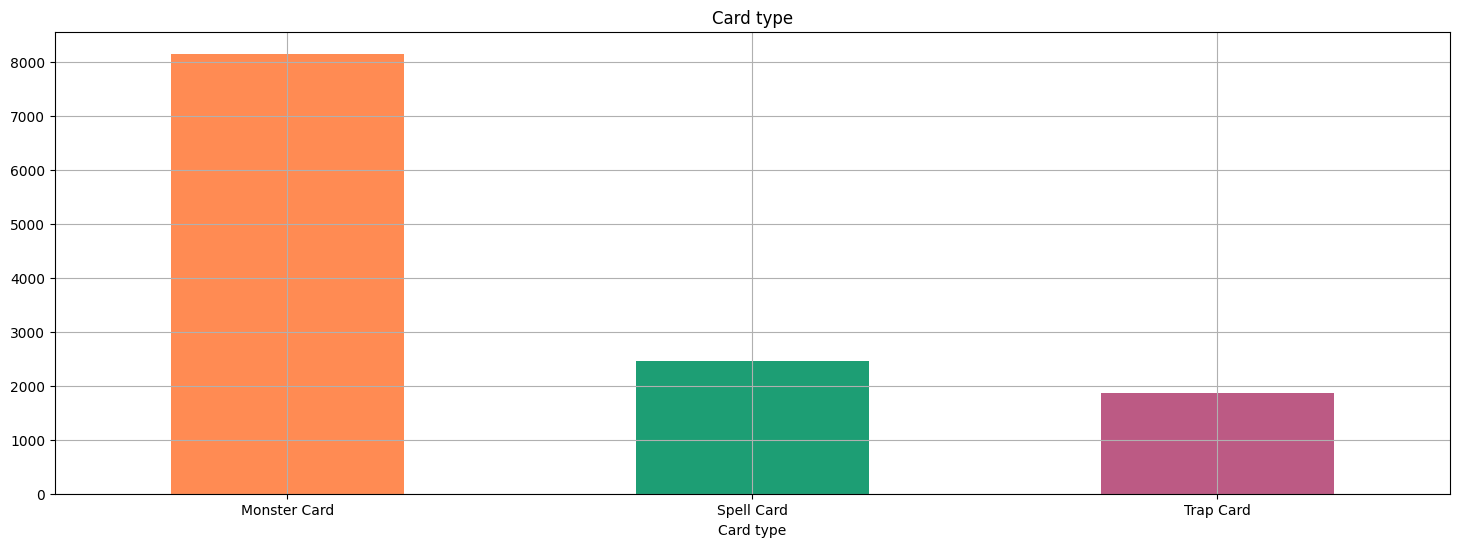

In [12]:
card_type_colors = [colors_dict[i] for i in full_df["Card type"].value_counts().index]
cards_df["Card type"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=card_type_colors, title="Card type"
)
plt.show()

## Monsters

### Attributes

In [13]:
print("Total number of attributes:", monster_df["Attribute"].nunique())

Total number of attributes:

7

In [14]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Attribute"
).nunique()

Name  Password  Archseries  Primary type  Secondary type  \
Attribute                                                             
DARK       2268      2253         474             7               7   
DIVINE        6         0           3             1               0   
EARTH      1895      1887         341             7               6   
FIRE        708       705         198             7               7   
LIGHT      1655      1628         399             7               7   
WATER       846       843         213             7               6   
WIND        773       770         222             7               6   

           Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
Attribute                                                                      
DARK                 24          156   64              12     6           42   
DIVINE                2            6    4               0     0            0   
EARTH                23          126   60              12     4           29   
FIRE                 22           85   40               8     4           23   
LIGHT                24          135   50              12     5           30   
WATER                22           93   42               9     4           16   
WIND                 24          105   38              11     4           14   

           ATK  Level/Rank  TCG status  OCG status  Artwork  \
Attribute                                                     
DARK        71          13           6           6        3   
DIVINE       4           2           2           2        1   
EARTH       71          12           4           6        3   
FIRE        43          12           3           5        3   
LIGHT       58          14           6           5        3   
WATER       58          12           5           5        3   
WIND        47          12           5           5        3   

           Modification date  Errata  
Attribute                             
DARK                    2264       4  
DIVINE                     9       3  
EARTH                   1893       4  
FIRE                     708       4  
LIGHT                   1653       4  
WATER                    844       4  
WIND                     773       4

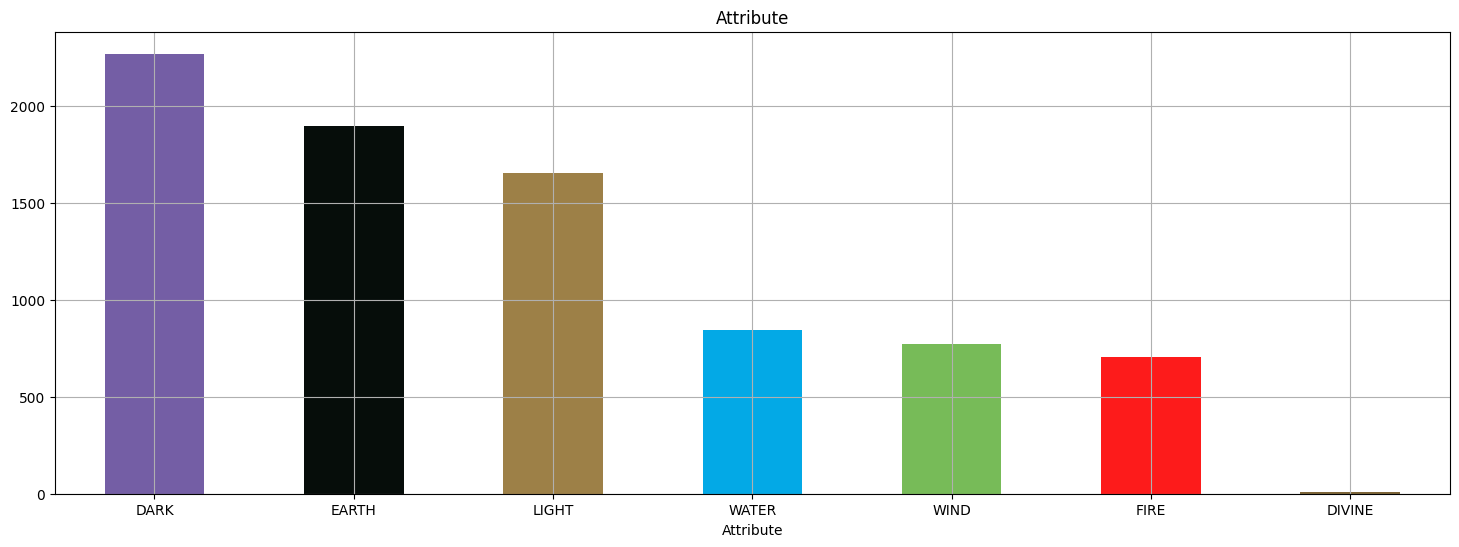

In [15]:
attribute_colors = [
    colors_dict[i] for i in monster_df["Attribute"].value_counts().index
]
monster_df["Attribute"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=attribute_colors, title="Attribute"
)
plt.show()

### Primary types

In [16]:
print("Total number of primary types:", monster_df["Primary type"].nunique())

Total number of primary types:

7

In [17]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Primary type"
).nunique()

Name  Password  Archseries  Attribute  Secondary type  \
Primary type                                                             
Effect Monster   5545      5506         800          7               8   
Fusion Monster    450       447         149          6               1   
Link Monster      383       375         142          6               0   
Normal Monster    710       703         112          6               1   
Ritual Monster    127       127          38          6               3   
Synchro Monster   435       430         166          6               1   
Xyz Monster       505       498         200          6               0   

                 Monster type  Effect type  DEF  Pendulum Scale  Link  \
Primary type                                                            
Effect Monster             26          207   66              14     0   
Fusion Monster             24           69   47               5     0   
Link Monster               23           52    0               0     6   
Normal Monster             23            6   48              10     0   
Ritual Monster             15           33   26               1     0   
Synchro Monster            23           58   39               4     0   
Xyz Monster                23           70   42               5     0   

                 Link Arrows  ATK  Level/Rank  TCG status  OCG status  \
Primary type                                                            
Effect Monster             0   73          12           6           6   
Fusion Monster             0   50          12           3           5   
Link Monster              62   39           0           4           6   
Normal Monster             0   58           8           4           3   
Ritual Monster             0   35          12           1           1   
Synchro Monster            0   42          13           5           5   
Xyz Monster                0   51          14           4           4   

                 Artwork  Modification date  Errata  
Primary type                                         
Effect Monster         3               5521       4  
Fusion Monster         3                449       4  
Link Monster           3                382       3  
Normal Monster         3                711       4  
Ritual Monster         1                127       4  
Synchro Monster        2                435       4  
Xyz Monster            2                501       4

#### Has effect discrimination

In [18]:
effect = pd.crosstab(
    monster_df["Primary type"],
    pd.isna(monster_df["Effect type"]),
    rownames=["Primary type"],
    colnames=["Has effect"],
).rename(columns={True: "No Effect", False: "Effect"})
effect

Has effect       Effect  No Effect
Primary type                      
Effect Monster     5545          0
Fusion Monster      389         61
Link Monster        378          5
Normal Monster       34        677
Ritual Monster      112         15
Synchro Monster     431          4
Xyz Monster         503          2

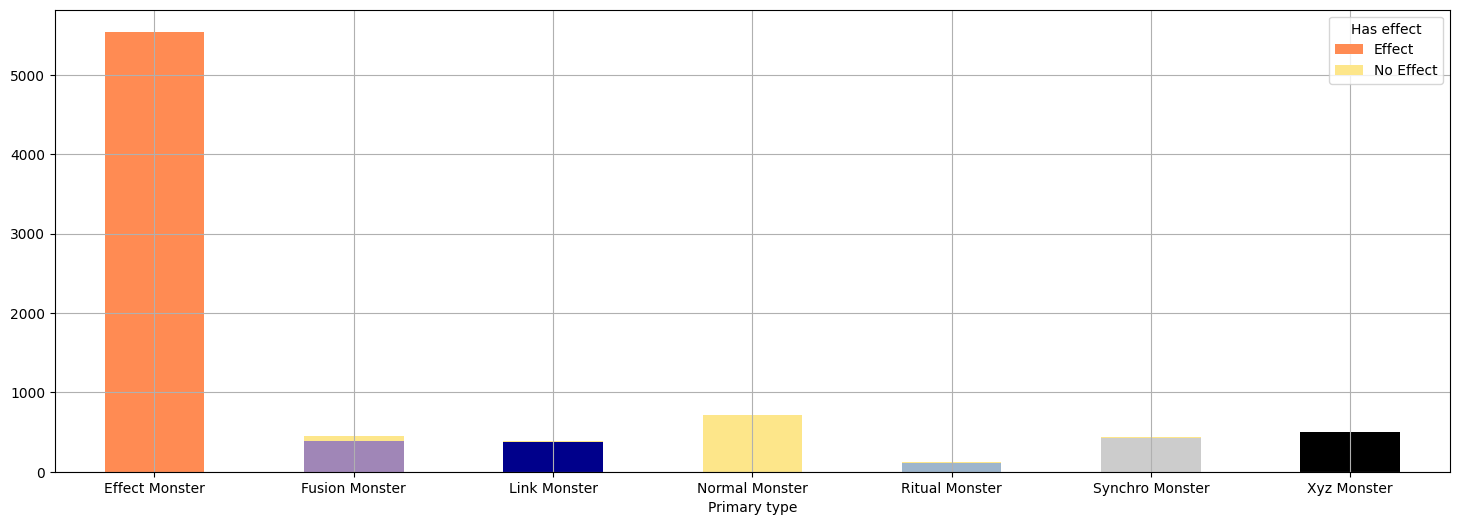

In [19]:
monster_type_colors = {
    "No Effect": colors_dict["Normal Monster"],
    "Effect": [colors_dict[i] for i in effect.index],
}
effect.plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    legend=True,
    color=monster_type_colors,
)
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [20]:
pendulum = pd.crosstab(
    monster_df["Primary type"],
    pd.isna(monster_df["Pendulum Scale"]),
    rownames=["Primary type"],
    colnames=["Is Pendulum"],
).rename(columns={True: "Not Pendulum", False: "Pendulum"})
pendulum

Is Pendulum      Pendulum  Not Pendulum
Primary type                           
Effect Monster        273          5272
Fusion Monster         11           439
Link Monster            0           383
Normal Monster         38           673
Ritual Monster          1           126
Synchro Monster         7           428
Xyz Monster             9           496

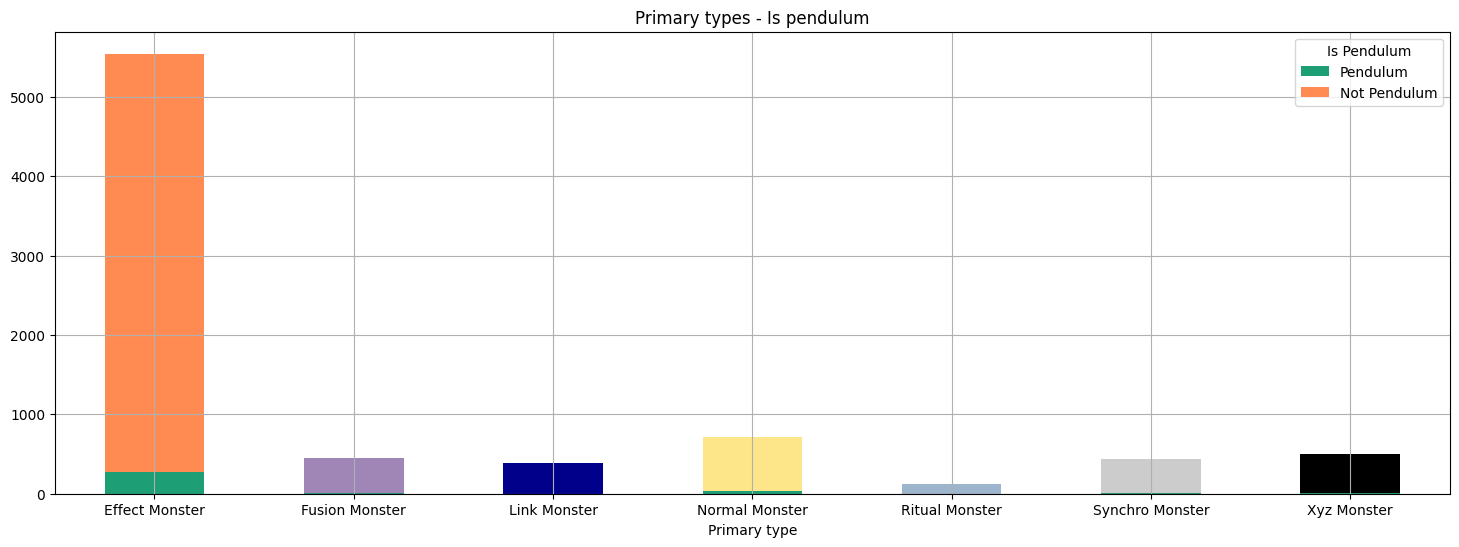

In [21]:
monster_type_colors_b = {
    "Pendulum": colors_dict["Pendulum Monster"],
    "Not Pendulum": [colors_dict[i] for i in pendulum.index],
}
pendulum.plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    color=monster_type_colors_b,
    legend=True,
    title="Primary types - Is pendulum",
)
plt.show()

#### By attribute

In [22]:
primmary_crosstab = pd.crosstab(cards_df["Primary type"], cards_df["Attribute"])
primmary_crosstab

Attribute        DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Primary type                                                  
Effect Monster   1516       6   1325   483   1119    559   537
Fusion Monster    157       0     82    35    103     36    37
Link Monster      130       0     76    36     87     29    25
Normal Monster    173       0    243    52     73    106    64
Ritual Monster     42       0     17     7     35     20     6
Synchro Monster   114       0     71    53     84     39    74
Xyz Monster       139       0     83    42    154     57    30

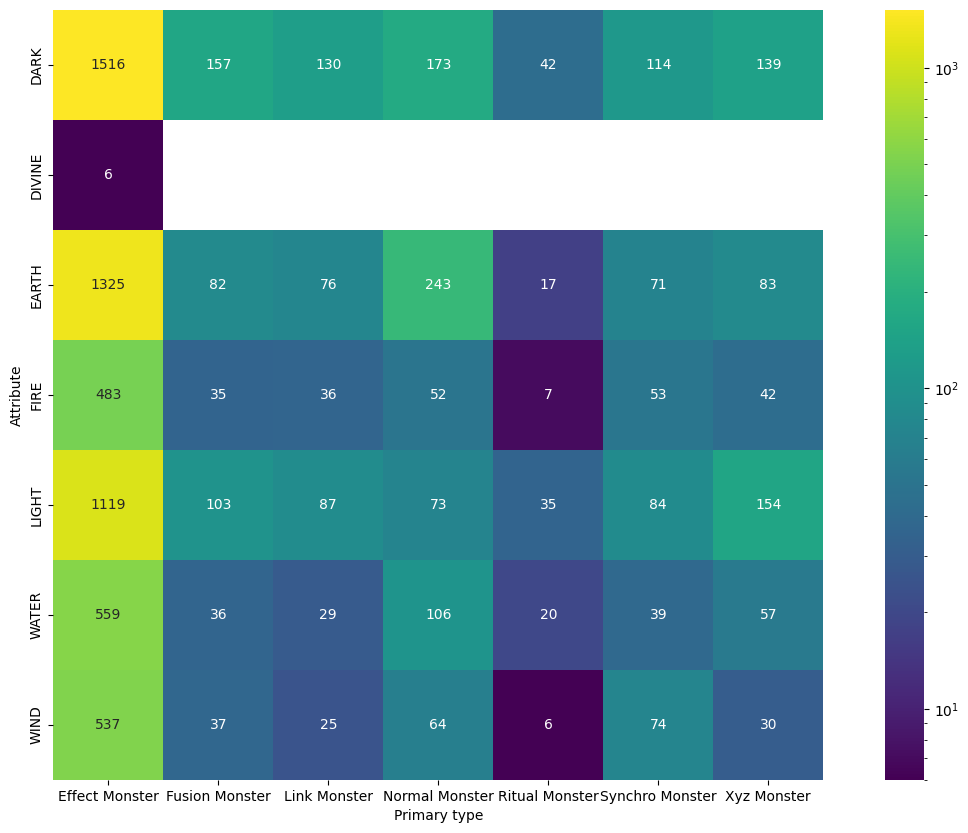

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    primmary_crosstab.T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Secondary types

In [24]:
exploded_secondary_type = monster_df.explode("Secondary type")
print(
    "Total number of secondary types:",
    exploded_secondary_type["Secondary type"].nunique(),
)

Total number of secondary types:

6

In [25]:
exploded_secondary_type.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Secondary type").nunique()

Name  Password  Archseries  Attribute  Primary type  \
Secondary type                                                        
Flip monster     187       186          46          6             2   
Gemini monster    45        45          13          6             1   
Spirit monster    39        39           4          6             2   
Toon monster      17        17          13          6             1   
Tuner monster    504       499         143          6             5   
Union monster     37        37           9          6             1   

                Monster type  Effect type  DEF  Pendulum Scale  ATK  \
Secondary type                                                        
Flip monster              19           21   33               1   38   
Gemini monster            18            6   19               0   17   
Spirit monster            13            8   20               2   22   
Toon monster               7            8   15               0   12   
Tuner monster             23           62   32               7   32   
Union monster              9            6   14               0   17   

                Level/Rank  TCG status  OCG status  Artwork  \
Secondary type                                                
Flip monster            12           3           4        1   
Gemini monster           8           1           1        0   
Spirit monster          10           1           1        1   
Toon monster             5           1           2        1   
Tuner monster            9           4           5        3   
Union monster            8           1           1        1   

                Modification date  Errata  
Secondary type                             
Flip monster                  187       4  
Gemini monster                 45       4  
Spirit monster                 39       2  
Toon monster                   17       3  
Tuner monster                 504       4  
Union monster                  37       3

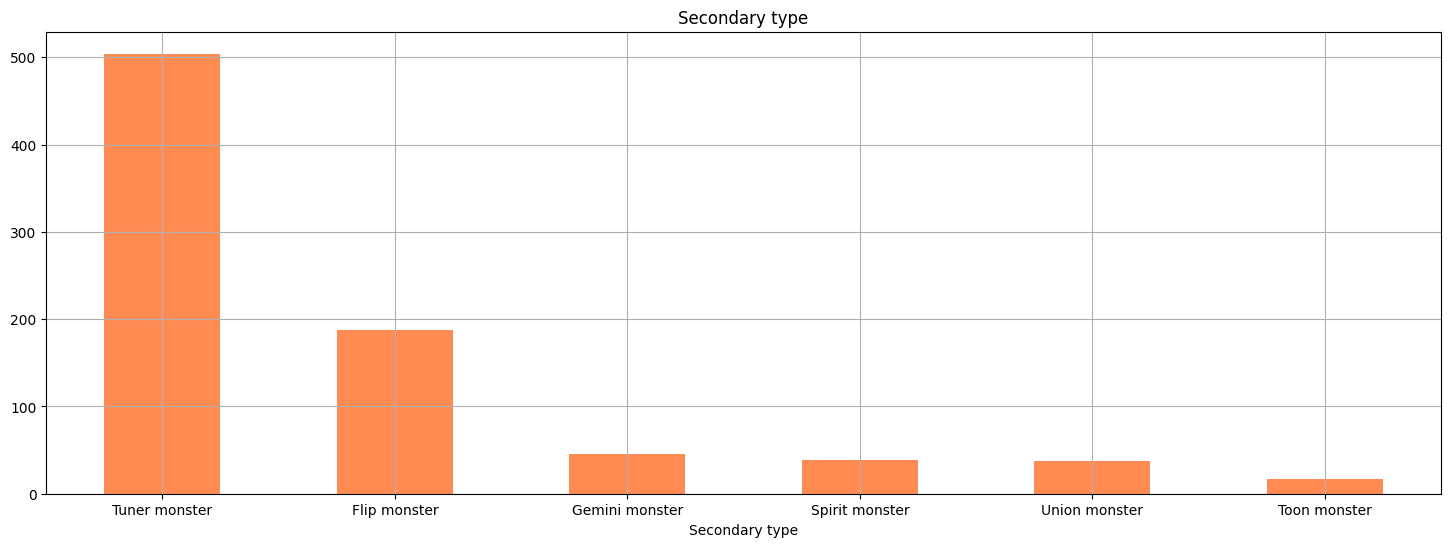

In [26]:
secondary_type_colors = colors_dict["Effect Monster"]
exploded_secondary_type["Secondary type"].value_counts().plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    color=secondary_type_colors,
    legend=False,
    title="Secondary type",
)
plt.show()

#### By attribute

In [27]:
secondary_crosstab = pd.crosstab(
    exploded_secondary_type["Secondary type"], exploded_secondary_type["Attribute"]
)
secondary_crosstab

Attribute       DARK  EARTH  FIRE  LIGHT  WATER  WIND
Secondary type                                       
Flip monster      51     63    10     33     13    17
Gemini monster    11      8     8      6      8     4
Spirit monster     5      6     6      5      6    11
Toon monster       7      5     1      2      1     1
Tuner monster    129     95    51    106     53    70
Union monster      6      9     3     12      4     3

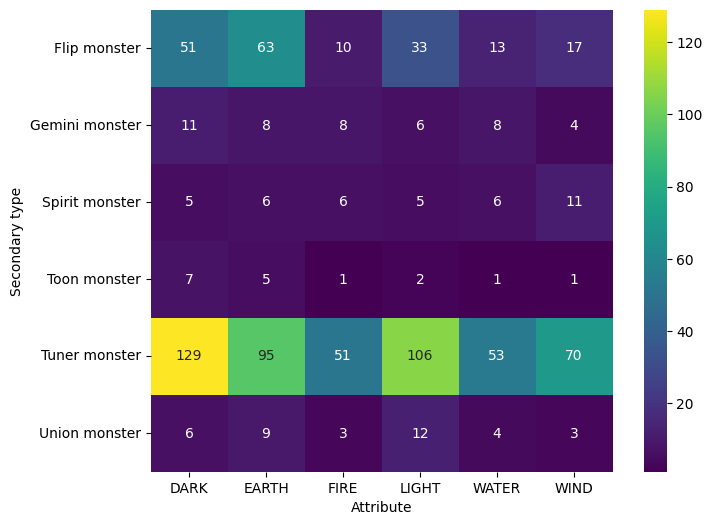

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    secondary_crosstab[secondary_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By secondary type

In [29]:
secondary_crosstab_b = pd.crosstab(
    exploded_secondary_type["Primary type"],
    exploded_secondary_type["Secondary type"],
    margins=True,
)
secondary_crosstab_b

Secondary type   Flip monster  Gemini monster  Spirit monster  Toon monster  \
Primary type                                                                  
Effect Monster            186              45              37            17   
Fusion Monster              0               0               0             0   
Normal Monster              0               0               0             0   
Ritual Monster              1               0               2             0   
Synchro Monster             0               0               0             0   
All                       187              45              39            17   

Secondary type   Tuner monster  Union monster  All  
Primary type                                        
Effect Monster             454             37  776  
Fusion Monster               3              0    3  
Normal Monster              12              0   12  
Ritual Monster               2              0    5  
Synchro Monster             33              0   33  
All                        504             37  829

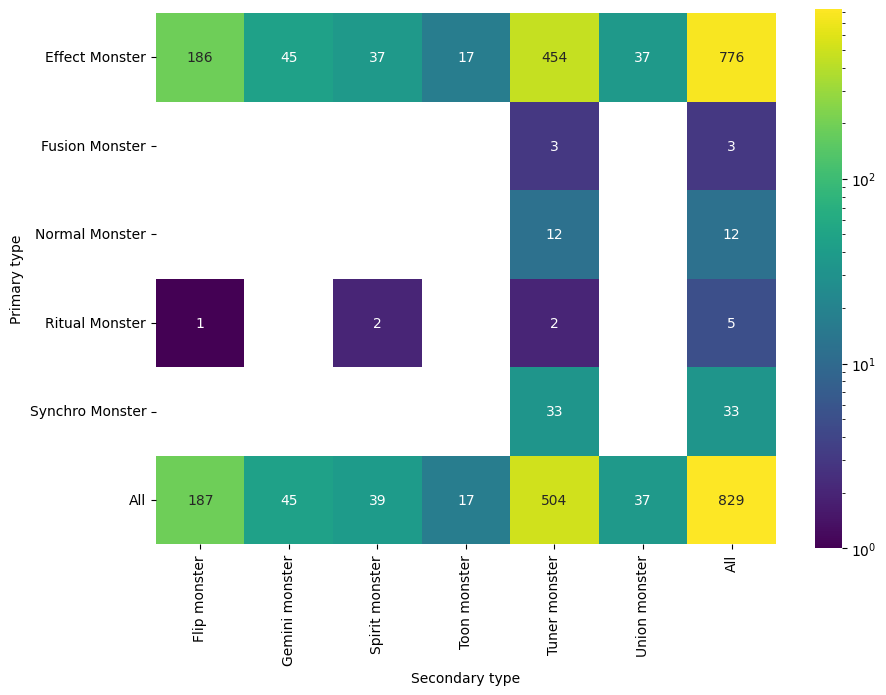

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    secondary_crosstab_b,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Monster types

In [31]:
print("Total number of monster types:", monster_df["Monster type"].nunique())

Total number of monster types:

26

In [32]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Monster type"
).nunique()

Name  Password  Archseries  Attribute  Primary type  \
Monster type                                                         
Aqua            256       256          67          6             7   
Beast           381       377          87          6             7   
Beast-Warrior   244       239          50          6             7   
Creator God       1         0           1          1             1   
Cyberse         261       261          37          6             7   
Dinosaur        134       132          26          6             6   
Divine-Beast      5         0           2          1             1   
Dragon          669       664         191          6             7   
Fairy           523       516         120          6             7   
Fiend           778       776         155          6             7   
Fish            128       128          21          5             7   
Illusion          4         4           1          3             2   
Insect          253       253          40          6             7   
Machine         937       932         171          6             7   
Plant           236       235          39          6             6   
Psychic         181       180          44          6             6   
Pyro            129       128          38          5             6   
Reptile         173       172          35          6             6   
Rock            250       249          75          6             7   
Sea Serpent      83        83          28          6             6   
Spellcaster     689       679         153          6             7   
Thunder         132       129          35          6             6   
Warrior        1055      1049         229          6             7   
Winged Beast    316       313          67          6             7   
Wyrm             89        88          22          6             6   
Zombie          243       243          36          6             7   

               Secondary type  Effect type  DEF  Pendulum Scale  Link  \
Monster type                                                            
Aqua                        6           51   34               3     2   
Beast                       4           61   38               7     2   
Beast-Warrior               3           57   31               6     3   
Creator God                 0            1    1               0     0   
Cyberse                     1           45   29               1     6   
Dinosaur                    1           36   32               4     2   
Divine-Beast                0            5    4               0     0   
Dragon                      6          109   48              10     5   
Fairy                       5           83   38               9     4   
Fiend                       6          108   45              12     5   
Fish                        2           31   28               1     1   
Illusion                    0            4    4               0     0   
Insect                      3           58   33               2     3   
Machine                     7          114   55               9     4   
Plant                       4           38   30               5     4   
Psychic                     2           43   31               5     2   
Pyro                        5           37   32               0     1   
Reptile                     3           46   31               3     2   
Rock                        4           60   40               4     3   
Sea Serpent                 3           32   26               1     2   
Spellcaster                 6          101   42              11     5   
Thunder                     4           40   29               1     2   
Warrior                     6           93   41               8     4   
Winged Beast                5           61   29               4     4   
Wyrm                        1           33   24               3     4   
Zombie                      6           52   37               2     3   

         

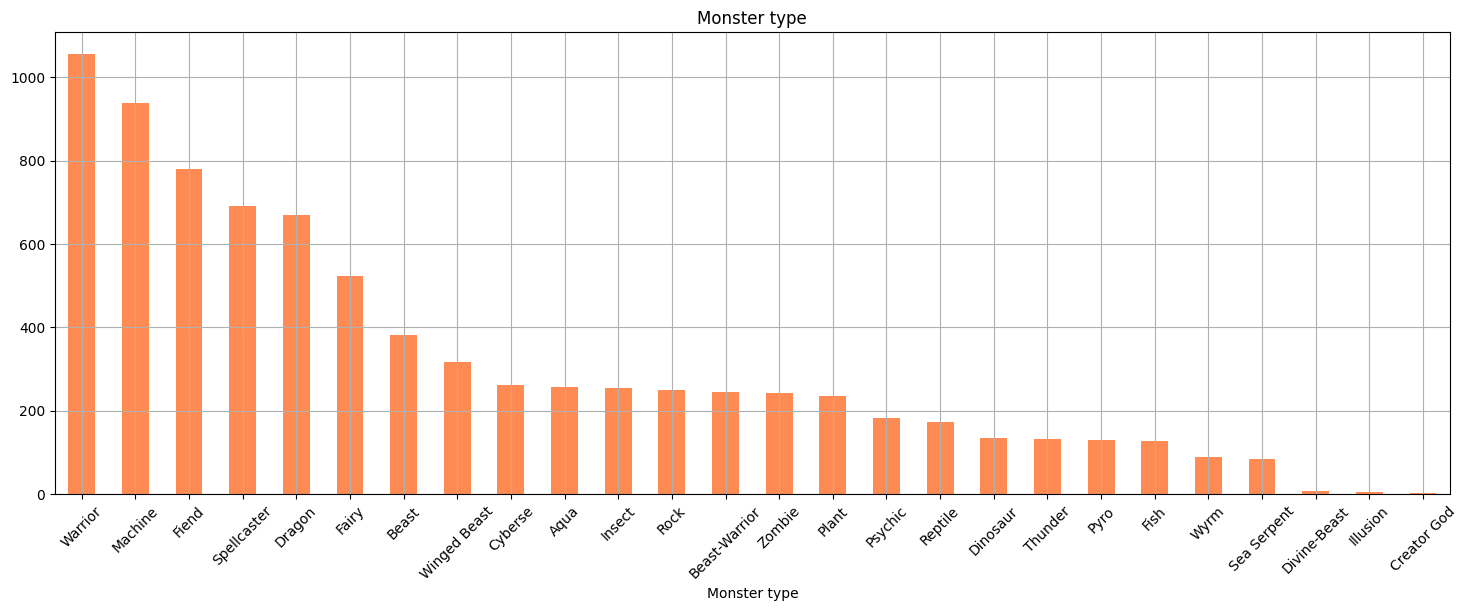

In [33]:
monster_type_colors = colors_dict["Monster Card"]
monster_df["Monster type"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=45, color=monster_type_colors, title="Monster type"
)
plt.show()

#### By Attribute

In [34]:
monster_crosstab = pd.crosstab(cards_df["Monster type"], cards_df["Attribute"])
monster_crosstab

Attribute      DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Monster type                                                
Aqua              9       0      6    10      4    221     6
Beast            38       0    212    16     74     15    27
Beast-Warrior    40       0     84    54     34     16    16
Creator God       0       1      0     0      0      0     0
Cyberse          73       0     36    49     62     28    13
Dinosaur         13       0     63    36      5      9     8
Divine-Beast      0       8      0     0      0      0     0
Dragon          257       0     48    50    173     28   113
Fairy            60       0     63    18    330     27    25
Fiend           586       0     34    48     71     25    16
Fish              2       0      2     0      1    121     2
Illusion          2       0      0     0      1      0     1
Insect           41       0    134     6     21      4    47
Machine         231       0    318    53    170     50   115
Plant            43       0    123    11     22     24    13
Psychic          23       0     38    17     47     13    43
Pyro              3       0      6   113      4      0     3
Reptile          39       0     34    16     45     35     4
Rock             17       0    202     5     14      5     7
Sea Serpent       3       0      1     1      2     72     4
Spellcaster     284       0     53    30    197     63    63
Thunder          14       0     10     5     80      4    19
Warrior         206       0    365   115    253     53    64
Winged Beast    112       0      8    17     15     12   152
Wyrm             15       0     19    12     23     12     8
Zombie          160       0     38    26      7      8     4

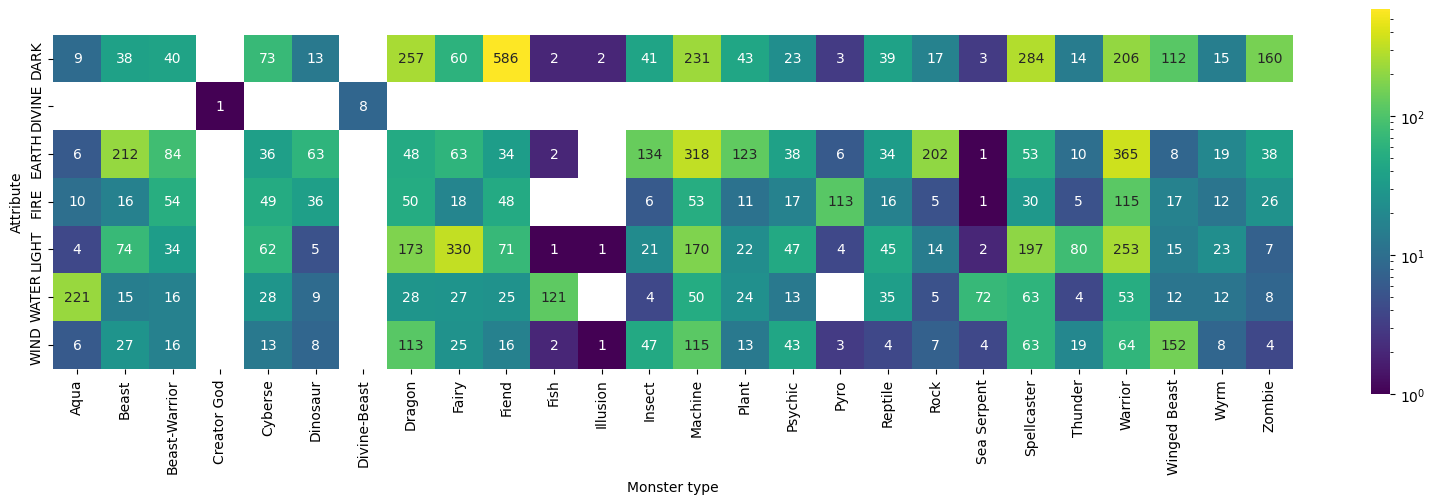

In [35]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab[monster_crosstab > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

#### By primary type

In [36]:
monster_crosstab_b = pd.crosstab(
    cards_df["Monster type"], cards_df["Primary type"], dropna=False
)
monster_crosstab_b

Primary type   Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Monster type                                                                  
Aqua                      154              12             3              57   
Beast                     278              19             9              50   
Beast-Warrior             167              11             9              21   
Creator God                 1               0             0               0   
Cyberse                   129               5            99               5   
Dinosaur                   93               9             4              18   
Divine-Beast                5               0             0               0   
Dragon                    351              65            33              45   
Fairy                     374              22            25              32   
Fiend                     547              50            29              72   
Fish                       92               5             1              17   
Illusion                    3               1             0               0   
Insect                    187               4            10              29   
Machine                   654              48            40              61   
Plant                     165               6            15              24   
Psychic                   124              11             5               9   
Pyro                       90               9             2              18   
Reptile                   142               2             3              18   
Rock                      172              18             5              27   
Sea Serpent                56               2             2               8   
Spellcaster               520              27            27              54   
Thunder                    99               9             5              10   
Warrior                   691              97            31              79   
Winged Beast              230               9            10              26   
Wyrm                       56               2             9               3   
Zombie                    165               7             7              28   

Primary type   Ritual Monster  Synchro Monster  Xyz Monster  
Monster type                                                 
Aqua                        8                4           18  
Beast                       1               14           11  
Beast-Warrior               5                8           23  
Creator God                 0                0            0  
Cyberse                     7                6           10  
Dinosaur                    0                5            5  
Divine-Beast                0                0            0  
Dragon                     15               98           62  
Fairy                      18               19           33  
Fiend                      15               26           41  
Fish                        1                9            3  
Illusion                    0                0            0  
Insect                      1                8           14  
Machine                     4               65           65  
Plant                       0                8           18  
Psychic                     0               19           13  
Pyro                        0                6            4  
Reptile                     0                5            3  
Rock                        7                5           16  
Sea Serpent                 0                5           10  
Spellcaster                18               17           27  
Thunder                     0                7            2  
Warrior                    17               57           84  
Winged Beast                4               15           22  
Wyrm                        0               10            9  
Zombie                      6               18           12

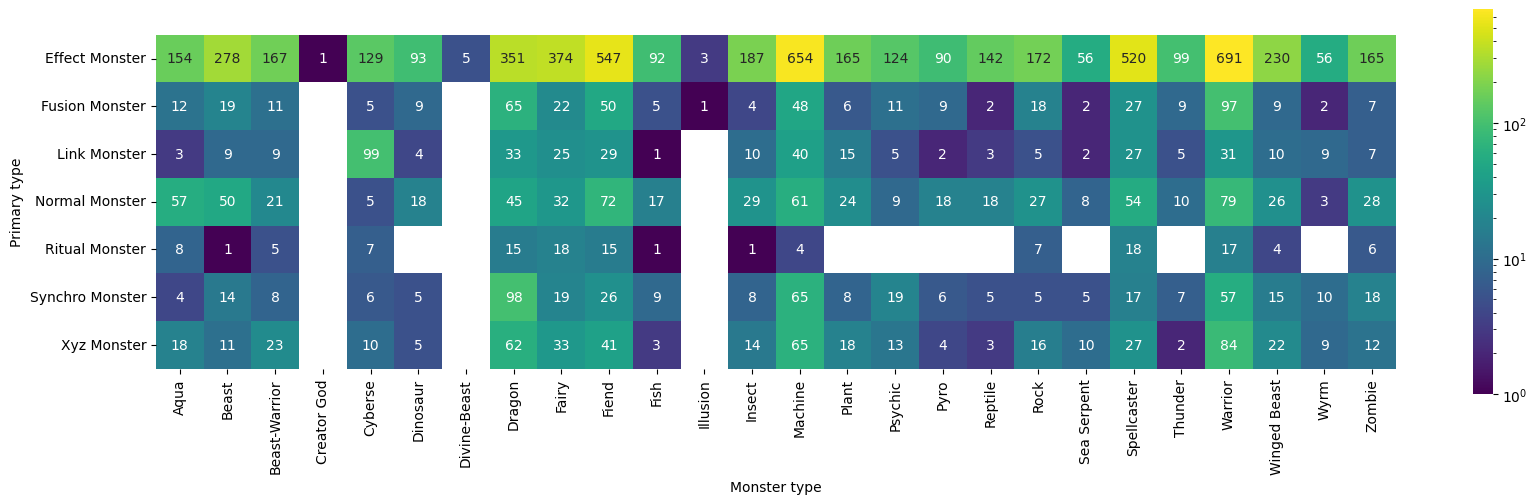

In [37]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab_b[monster_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

#### By secondary type

In [38]:
monster_crosstab_c = pd.crosstab(
    exploded_secondary_type["Monster type"],
    exploded_secondary_type["Secondary type"],
    dropna=False,
)
monster_crosstab_c

Secondary type  Flip monster  Gemini monster  Spirit monster  Toon monster  \
Monster type                                                                 
Aqua                       4               4               1             1   
Beast                     15               1               2             0   
Beast-Warrior              1               0               1             0   
Cyberse                    0               0               0             0   
Dinosaur                   0               0               0             0   
Dragon                     1               6               1             3   
Fairy                      8               2               8             0   
Fiend                     27               4               2             1   
Fish                       0               1               0             0   
Insect                    20               2               0             0   
Machine                   10               1               0             4   
Plant                      4               1               0             0   
Psychic                    3               0               0             0   
Pyro                       4               2               2             0   
Reptile                   18               1               0             0   
Rock                      12               1               2             0   
Sea Serpent                1               1               0             0   
Spellcaster               35               3               4             4   
Thunder                    3               1               1             0   
Warrior                   12               9               6             3   
Winged Beast               5               2               7             1   
Wyrm                       0               0               0             0   
Zombie                     4               3               2             0   

Secondary type  Tuner monster  Union monster  
Monster type                                  
Aqua                       11              3  
Beast                      22              0  
Beast-Warrior               9              0  
Cyberse                     9              0  
Dinosaur                    8              0  
Dragon                     46              4  
Fairy                      25              5  
Fiend                      45              1  
Fish                        8              0  
Insect                     12              0  
Machine                    87             18  
Plant                      20              1  
Psychic                    24              0  
Pyro                        9              1  
Reptile                     7              0  
Rock                        3              0  
Sea Serpent                 9              0  
Spellcaster                42              0  
Thunder                     9              0  
Warrior                    35              3  
Winged Beast               31              0  
Wyrm                       10              0  
Zombie                     23              1

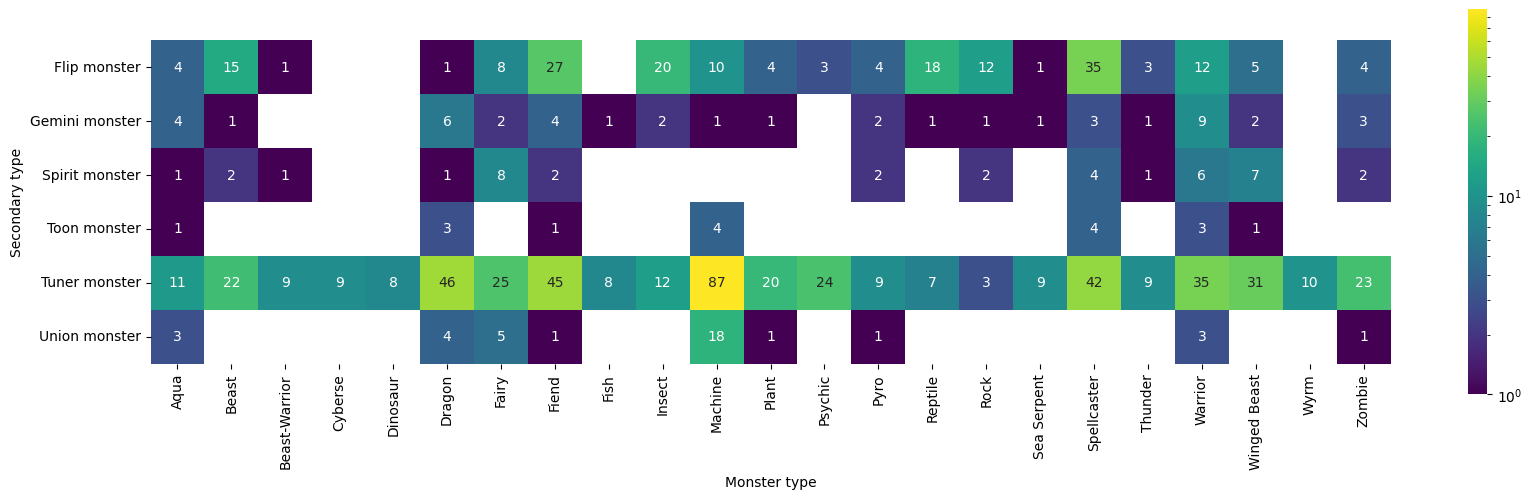

In [39]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab_c[monster_crosstab_c > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Effect type

In [40]:
print("Total number of effect types:", monster_df["Effect type"].explode().nunique())

Total number of effect types:

14

In [41]:
monster_df[monster_df["Effect type"].notna()].drop(
    columns=["Card type", "Page name", "Page URL"]
).explode("Effect type").groupby("Effect type").nunique()

Name  Password  Archseries  Attribute  Primary type  \
Effect type                                                                   
Activation condition       1         1           1          1             1   
Condition               3241      3188         671          7             7   
Continuous Effect       2198      2189         575          7             6   
Continuous-like Effect   239       237          74          6             6   
Flip effect              143       142          40          6             1   
Ignition Effect         2679      2666         661          7             6   
Ignition-like Effect     230       220          81          6             6   
Lingering effect          20        20          13          6             3   
Maintenance cost          44        44           8          6             3   
Quick Effect            1072      1070         407          6             6   
Quick-like Effect          4         4           1          1             1   
Summoning condition      945       908         324          7             6   
Trigger Effect          4476      4453         804          7             7   
Unclassified effect      838       827         284          7             6   

                        Secondary type  Monster type  DEF  Pendulum Scale  \
Effect type                                                                 
Activation condition                 0             1    1               1   
Condition                            7            26   64              13   
Continuous Effect                    5            25   52              12   
Continuous-like Effect               4            21   36              13   
Flip effect                          2            18   31               1   
Ignition Effect                      7            25   61              12   
Ignition-like Effect                 3            20   34              13   
Lingering effect                     2            15   14               0   
Maintenance cost                     0            12   18               2   
Quick Effect                         5            24   50               9   
Quick-like Effect                    0             1    2               0   
Summoning condition                  4            25   52              10   
Trigger Effect                       7            25   63              14   
Unclassified effect                  5            26   45               9   

                        Link  Link Arrows  ATK  Level/Rank  TCG status  \
Effect type                                                              
Activation condition       0            0    1           1           1   
Condition                  6           54   64          14           5   
Continuous Effect          6           48   59          14           4   
Continuous-like Effect     1            2   42          11           3   
Flip effect                0            0   34          12           3   
Ignition Effect            5           42   66          13           4   
Ignition-like Effect       1            1   37          12           3   
Lingering effect           2            2   14           8           2   
Maintenance cost           1            1   21           8           1   
Quick Effect               6           29   51          13           5   
Quick-like Effect          0            0    3           1           1   
Summoning condition        5            8   53          13           4   
Trigger Effect             6           51   69          14           5   
Unclassified effect        5           12   49          13           4   

                        OCG status  Artwork  Modification date  Errata  
Effect type                                                             
Activation condition             1        0                  1       1  
Condition                        6        3               3232       4  
Continuous Effect                5        3      

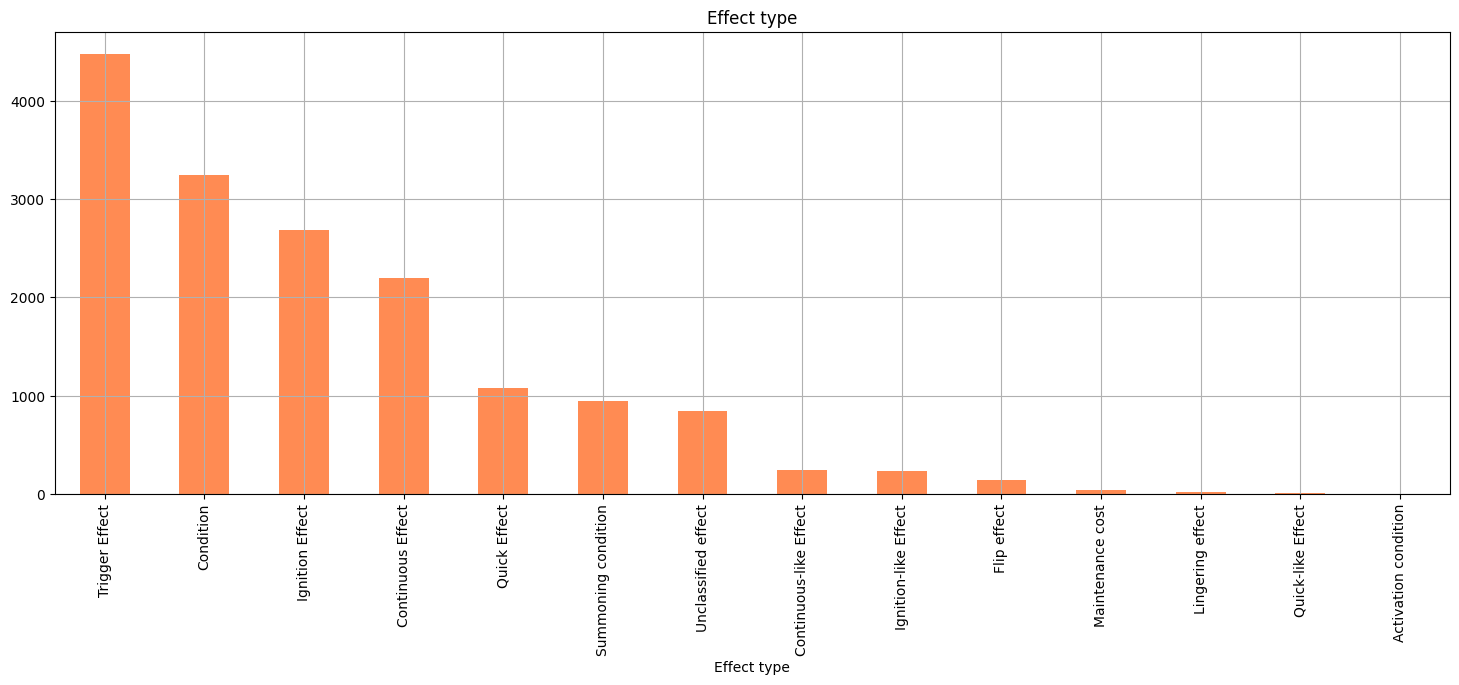

In [42]:
monster_effect_colors = colors_dict["Effect Monster"]
monster_df["Effect type"].explode("Effect type").value_counts().plot.bar(
    figsize=(18, 6), grid=True, color=monster_effect_colors, title="Effect type"
)
# plt.yscale('log')
plt.show()

### ATK

In [43]:
print("Total number of ATK values:", monster_df["ATK"].nunique())

Total number of ATK values:

84

In [44]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "ATK"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
ATK                                                                         
0      610       607         235          6             7               7   
50       2         2           2          2             1               0   
100    220       220         110          6             5               3   
150      1         1           0          1             1               0   
200    122       122          69          6             6               5   
...    ...       ...         ...        ...           ...             ...   
5000     9         9           6          3             5               0   
?       80        76          37          7             5               1   
???      1         0           0          1             1               0   
????     1         0           1          1             0               0   
X000     1         0           1          1             0               0   

      Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
ATK                                                                       
0               23           95   35               9     5           15   
50               2            2    2               0     0            0   
100             20           48   27               9     2            2   
150              1            0    1               0     0            0   
200             20           36   22               5     1            2   
...            ...          ...  ...             ...   ...          ...   
5000             4            8    4               0     1            1   
?               20           35    8               2     1            1   
???              0            0    1               0     0            0   
????             1            0    1               0     0            0   
X000             1            0    1               0     0            0   

      Level/Rank  TCG status  OCG status  Artwork  Modification date  Errata  
ATK                                                                           
0             13           5           5        3                610       4  
50             1           1           1        0                  2       0  
100           11           3           3        2                220       4  
150            1           1           1        0                  1       0  
200            7           2           2        1                122       4  
...          ...         ...         ...      ...                ...     ...  
5000           2           1           1        1                  9       2  
?             13           2           2        3                 80       4  
???            1           0           1        0                  1       0  
????           1           1           1        0                  1       1  
X000           1           1           1        0                  1       1  

[84 rows x 18 columns]

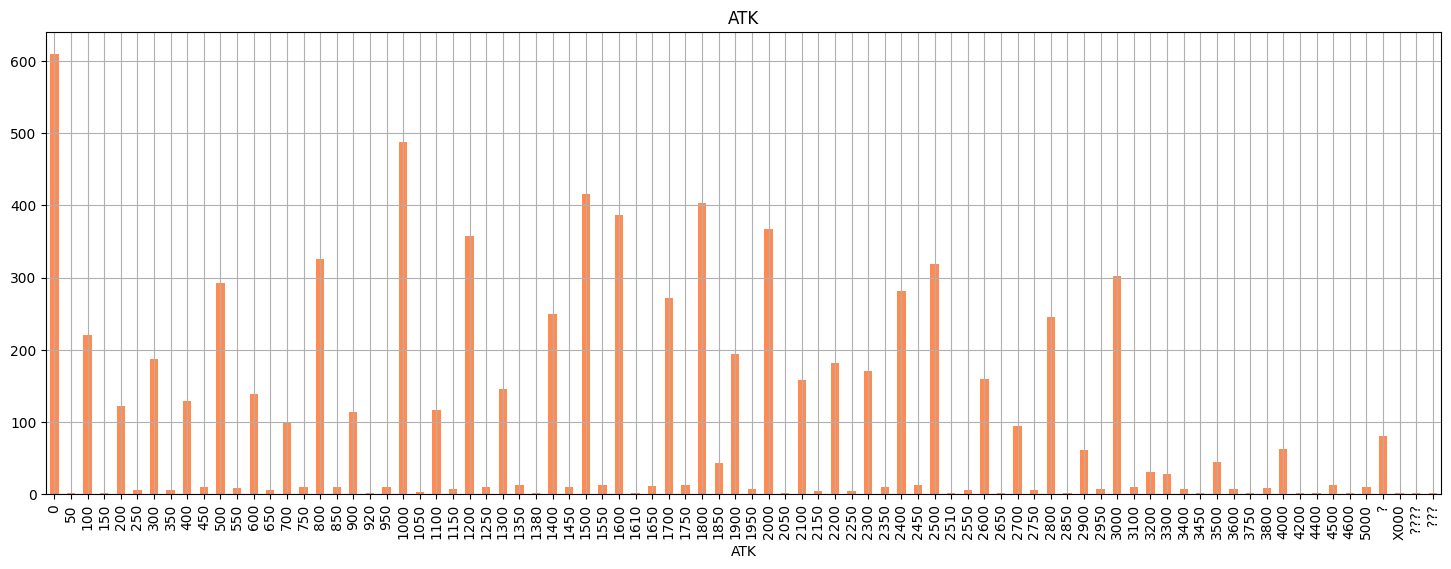

In [45]:
atk_colors = colors_dict["Monster Card"]
monster_df["ATK"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, color=atk_colors, title="ATK")
plt.show()

### DEF

In [46]:
print("Total number of DEF values:", monster_df["DEF"].nunique())

Total number of DEF values:

79

In [47]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "DEF"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
DEF                                                                         
0      765       764         261          6             6               8   
50       1         1           1          1             1               0   
100    213       212          98          6             5               4   
200    255       255         110          6             5               5   
250      8         8           3          4             2               1   
...    ...       ...         ...        ...           ...             ...   
5000     5         5           3          3             2               0   
?       54        50          26          7             4               1   
???      1         0           0          1             1               0   
????     1         0           1          1             0               0   
X000     1         0           1          1             0               0   

      Monster type  Effect type  Pendulum Scale  Link  Link Arrows  ATK  \
DEF                                                                       
0               23          104              10     0            0   45   
50               1            1               0     0            0    1   
100             19           47               9     0            0   24   
200             23           48               5     0            0   31   
250              5            5               0     0            0    4   
...            ...          ...             ...   ...          ...  ...   
5000             3            4               0     0            0    2   
?               17           26               1     0            0    2   
???              0            0               0     0            0    1   
????             1            0               0     0            0    1   
X000             1            0               0     0            0    1   

      Level/Rank  TCG status  OCG status  Artwork  Modification date  Errata  
DEF                                                                           
0             13           4           4        2                762       4  
50             1           1           1        0                  1       0  
100           10           2           3        2                213       4  
200           10           2           3        2                255       4  
250            2           1           1        0                  8       2  
...          ...         ...         ...      ...                ...     ...  
5000           2           1           1        1                  5       2  
?             13           2           2        2                 54       4  
???            1           0           1        0                  1       0  
????           1           1           1        0                  1       1  
X000           1           1           1        0                  1       1  

[79 rows x 18 columns]

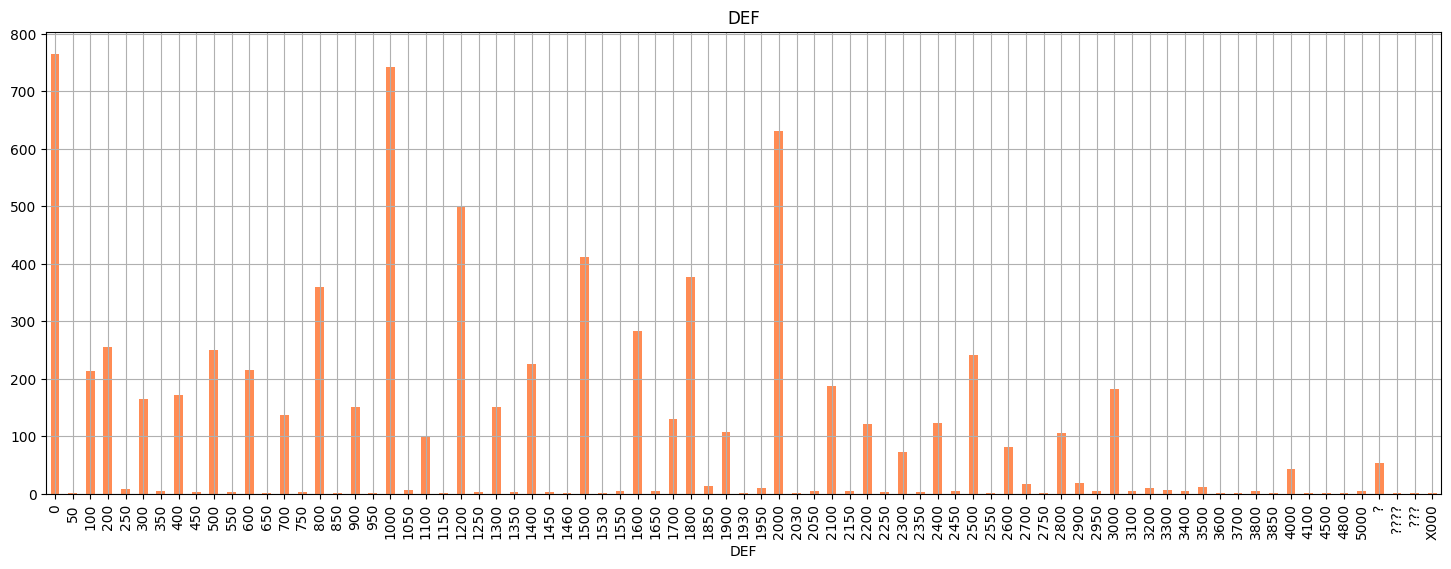

In [48]:
def_colors = colors_dict["Monster Card"]
monster_df["DEF"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, color=def_colors, title="DEF")
plt.show()

### Level/Rank

In [49]:
monster_df.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Level/Rank").nunique().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
)

Name  Password  Archseries  Attribute  Primary type  \
Level/Rank                                                        
0              6         6           3          2             2   
1            620       618         229          6             6   
2            682       681         213          6             6   
3           1162      1160         298          6             6   
4           2373      2369         521          6             6   
5            613       611         252          6             6   
6            627       621         242          6             6   
7            476       471         229          6             6   
8            703       685         311          6             6   
9            152       151          90          6             5   
10           258       246         153          7             5   
11            32        31          24          6             5   
12            63        60          45          7             5   
13             1         1           1          1             1   

            Secondary type  Monster type  Effect type  DEF  Pendulum Scale  \
Level/Rank                                                                   
0                        0             2            5    3               0   
1                        7            23           82   30              11   
2                        6            23           77   30               7   
3                        6            23           96   37               9   
4                        6            24          135   47               9   
5                        6            23           85   39               8   
6                        6            23           92   39               9   
7                        6            24          102   35               9   
8                        5            24          111   41               8   
9                        2            21           56   27               1   
10                       2            22           78   35               6   
11                       3            14           22   17               1   
12                       1            13           35   19               5   
13                       0             1            1    1               0   

            ATK  TCG status  OCG status  Artwork  Modification date  Errata  
Level/Rank                                                                   
0             3           2           2        0                  6       1  
1            22           3           4        2                619       4  
2            29           4           5        1                681       4  
3            41           3           4        3               1162       4  
4            54           4           6        3               2368       4  
5            46           3           4        2                613       4  
6            39           5           6        3                628       4  
7            38           6           5        2                478       4  
8            42           4           6        3                705       4  
9            33           4           3        1                152       4  
10           34           3           4        3                261       4  
11           15           2           2        1                 32       2  
12           14           2           3        1                 63       3  
13            1           1           1        0                  1       0

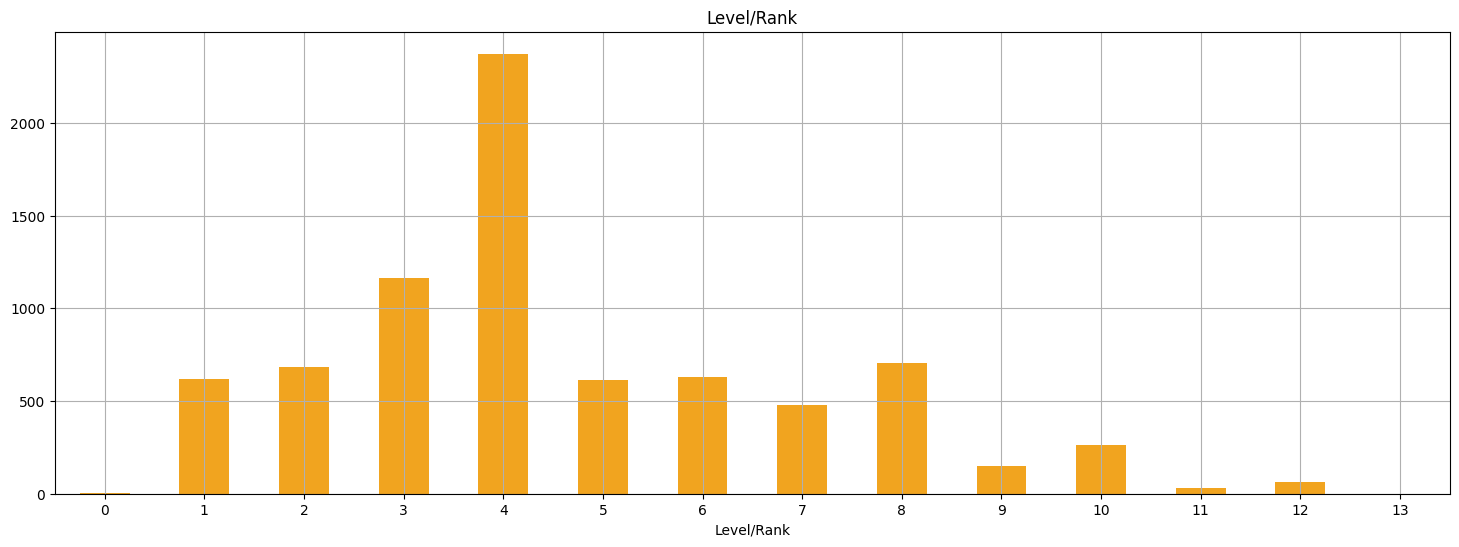

In [50]:
stars_colors = colors_dict["Level"]
monster_df["Level/Rank"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, rot=0, color=stars_colors, title="Level/Rank")
plt.show()

#### ATK statistics

In [51]:
monster_df[["Level/Rank", "ATK"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Level/Rank").describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            611.0   245.908347   352.065965  0.0     0.0   100.0   300.0   
2            680.0   581.985294   407.472217  0.0   300.0   500.0   800.0   
3           1159.0   956.816221   485.885542  0.0   600.0  1000.0  1300.0   
4           2361.0  1418.818297   540.839117  0.0  1200.0  1500.0  1800.0   
5            610.0  1761.180328   640.109994  0.0  1500.0  1900.0  2200.0   
6            623.0  2015.329053   611.901138  0.0  1900.0  2200.0  2400.0   
7            473.0  2287.420719   615.654972  0.0  2200.0  2500.0  2600.0   
8            695.0  2547.122302   703.653746  0.0  2500.0  2800.0  3000.0   
9            149.0  2582.885906   850.730446  0.0  2500.0  2800.0  3000.0   
10           238.0  2809.033613  1205.058042  0.0  2800.0  3000.0  3500.0   
11            32.0  3006.250000  1061.097271  0.0  3000.0  3350.0  3500.0   
12            58.0  3245.689655  1426.758210  0.0  3000.0  3800.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [52]:
monster_df[["Level/Rank", "DEF"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Level/Rank").describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            613.0   352.528548   532.296143  0.0     0.0   100.0   400.0   
2            681.0   673.201175   562.470158  0.0   200.0   550.0   900.0   
3           1159.0   957.679034   575.388775  0.0   600.0   900.0  1300.0   
4           2363.0  1169.246720   609.742404  0.0   800.0  1200.0  1600.0   
5            611.0  1431.833061   673.897578  0.0  1000.0  1500.0  1900.0   
6            623.0  1548.121990   708.595258  0.0  1200.0  1600.0  2000.0   
7            475.0  1889.894737   651.898388  0.0  1600.0  2000.0  2325.0   
8            702.0  1978.774929   843.455756  0.0  1600.0  2100.0  2500.0   
9            149.0  2264.093960   825.646359  0.0  2000.0  2500.0  2900.0   
10           247.0  2230.566802  1264.865623  0.0  1800.0  2500.0  3000.0   
11            32.0  2685.937500  1135.159103  0.0  2375.0  3000.0  3400.0   
12            59.0  2855.932203  1588.674484  0.0  2000.0  3200.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [53]:
monster_df.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Pendulum Scale").nunique().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
)

Name  Password  Archseries  Attribute  Primary type  \
Pendulum Scale                                                        
0                 12        11           9          5             2   
1                 71        67          41          6             5   
2                 36        36          15          6             2   
3                 37        37          17          6             3   
4                 33        33          17          5             5   
5                 34        34          16          6             2   
6                 15        15           9          4             1   
7                 27        27          16          6             2   
8                 45        43          25          6             5   
9                  8         8           3          3             2   
10                15        12           8          6             5   
11                 1         1           0          1             1   
12                 3         3           3          2             2   
13                 2         1           2          2             2   

                Secondary type  Monster type  Effect type  DEF  ATK  \
Pendulum Scale                                                        
0                            1             9           10    7    6   
1                            2            10           39   27   28   
2                            1            11           21   22   17   
3                            1            16           24   15   23   
4                            0             8           25   16   18   
5                            1            12           20   21   23   
6                            1             7           11   11   11   
7                            1            14           14   17   19   
8                            1             9           24   19   19   
9                            1             3            5    2    3   
10                           0             6           11    8    6   
11                           0             1            1    1    1   
12                           0             3            3    3    3   
13                           0             2            2    2    2   

                Level/Rank  TCG status  OCG status  Artwork  \
Pendulum Scale                                                
0                        7           1           2        1   
1                       11           3           4        1   
2                        6           2           2        1   
3                        8           1           1        0   
4                        8           1           1        2   
5                        7           3           3        0   
6                        6           1           1        0   
7                        6           1           1        1   
8                        8           1           3        0   
9                        5           1           1        0   
10                       6           2           2        0   
11                       1           1           0        0   
12                       2           1           1        0   
13                       2           1           2        0   

                Modification date  Errata  
Pendulum Scale                             
0                              12       1  
1                              71       3  
2                              36       2  
3                              37       1  
4                              33       2  
5                              34       2  
6                              15       1  
7                              27       3  
8                              45       2  
9                               8       0  
10                             15       0  
11                              1       0  
12                              3       0  
13                              2       0

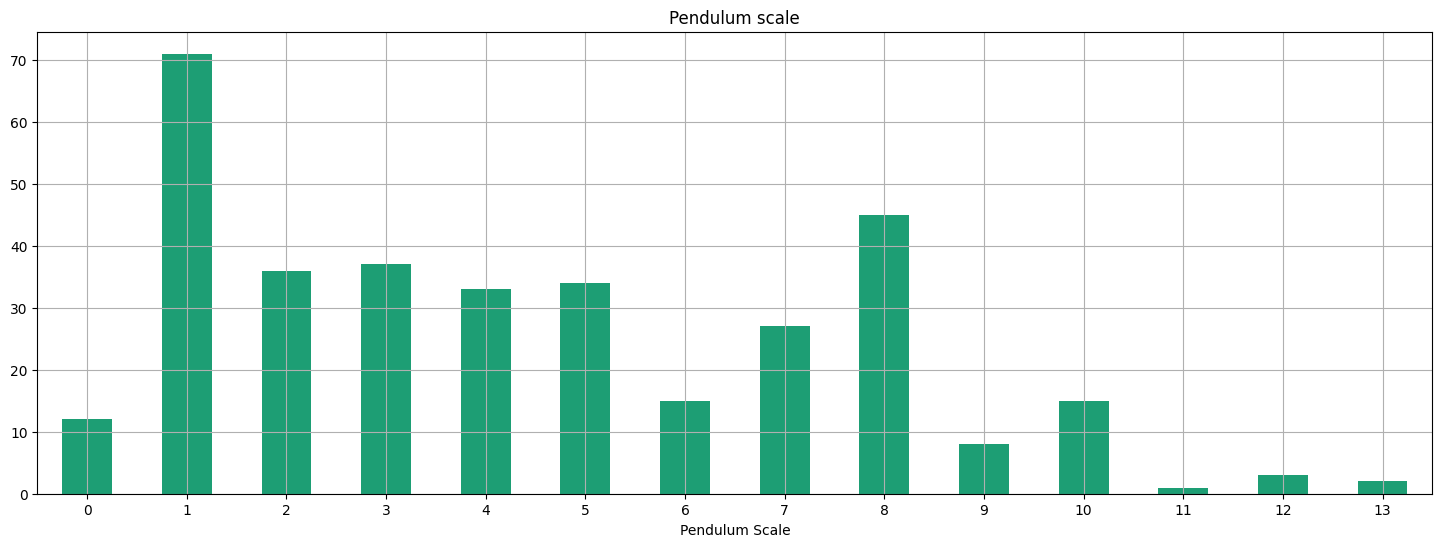

In [54]:
scales_colors = colors_dict["Pendulum Monster"]
monster_df["Pendulum Scale"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=scales_colors, title="Pendulum scale"
)
plt.show()

#### ATK statistics

In [55]:
monster_df[["Pendulum Scale", "ATK"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               12.0  1175.000000  1294.130104     0.0     0.0   650.0   
1               70.0  1751.428571  1031.214685     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               45.0  1200.000000   927.606892     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
11               1.0   100.000000          NaN   100.0   100.0   100.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               2.0  2000.000000  2828.427125     0.0  1000.0  2000.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1800.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
11               100.0   100.0  
12              2275.0  3000.0  
13              3000.0  4000.0

#### DEF statistics

In [56]:
monster_df[["Pendulum Scale", "DEF"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               12.0  1391.666667  1422.199534     0.0     0.0   850.0   
1               71.0  1638.028169   962.491736     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               45.0  1080.000000   758.467354     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
11               1.0   100.000000          NaN   100.0   100.0   100.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               2.0  2000.000000  2828.427125     0.0  1000.0  2000.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  4000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1700.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
11               100.0   100.0  
12              2275.0  3000.0  
13              3000.0  4000.0

#### Level/Rank statistics

In [57]:
monster_df[["Pendulum Scale", "Level/Rank"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    12.0  6.166667  3.833663  1.0  2.50   7.0   8.50  12.0
1                    71.0  6.056338  2.395754  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    45.0  3.800000  2.272364  1.0  2.00   4.0   4.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
11                    1.0  1.000000       NaN  1.0  1.00   1.0   1.00   1.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    2.0  9.500000  3.535534  7.0  8.25   9.5  10.75  12.0

### Link

In [58]:
monster_df.drop(
    columns=[
        "Card type",
        "Primary type",
        "Secondary type",
        "Level/Rank",
        "DEF",
        "Pendulum Scale",
        "Page name",
        "Page URL",
    ]
).groupby("Link").nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link                                                                     
1       51        51          27          6            12           18   
2      190       189         105          6            23           32   
3       85        84          49          6            16           25   
4       46        43          25          6            16           21   
5        9         6           5          2             5            6   
6        2         2           2          1             1            2   

      Link Arrows  ATK  TCG status  OCG status  Artwork  Modification date  \
Link                                                                         
1               8   11           3           3        1                 51   
2              19   24           2           4        3                190   
3              17   18           2           3        2                 85   
4              13   12           3           3        3                 46   
5               3    4           2           2        0                  9   
6               2    2           1           1        0                  2   

      Errata  
Link          
1          1  
2          3  
3          2  
4          1  
5          0  
6          0

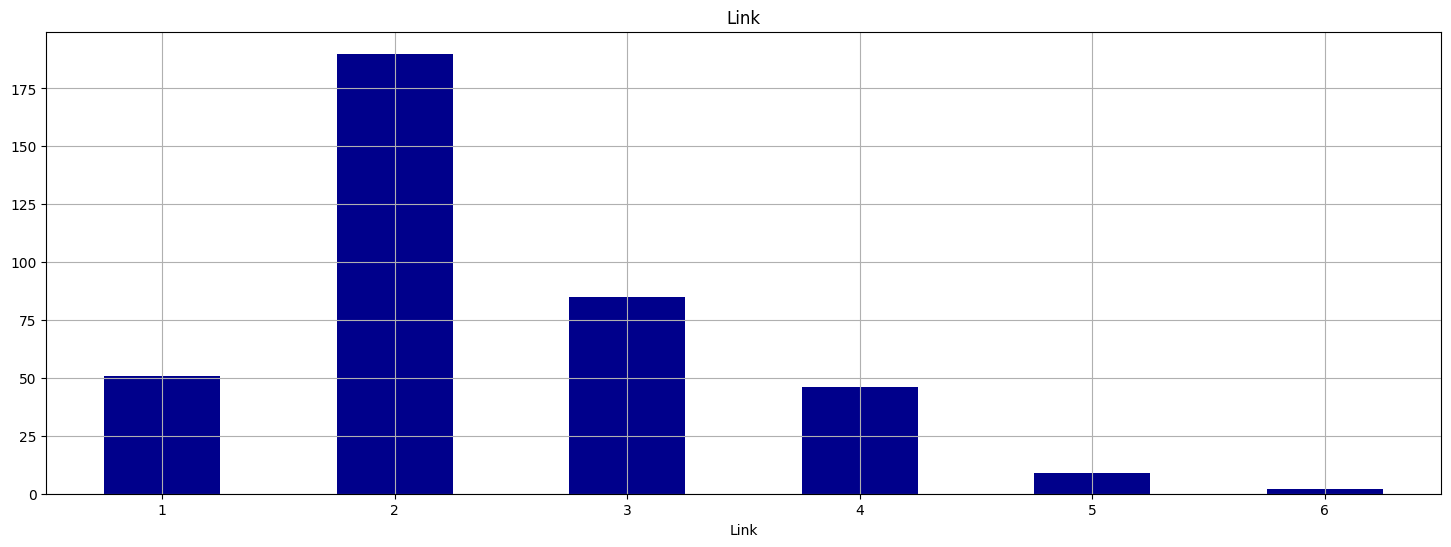

In [59]:
link_colors = colors_dict["Link Monster"]
monster_df["Link"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, rot=0, color=link_colors, title="Link")
plt.show()

#### ATK statistics

In [60]:
monster_df[["Link", "ATK"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Link").describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      51.0   758.823529   575.561107     0.0   300.0   800.0  1000.0  3000.0
2     190.0  1413.947368   509.437596     0.0  1100.0  1500.0  1800.0  2300.0
3      85.0  2267.647059   652.317566     0.0  2200.0  2400.0  2500.0  4000.0
4      45.0  2671.111111   641.242481     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [61]:
print("Total number of link arrow combinations:", monster_df["Link Arrows"].nunique())

Total number of link arrow combinations:

62

In [62]:
monster_df.drop(
    columns=[
        "Card type",
        "Primary type",
        "Level/Rank",
        "Pendulum Scale",
        "Link",
        "Secondary type",
        "DEF",
        "Page name",
        "Page URL",
    ]
).groupby("Link Arrows").nunique()

Name  Password  Archseries  Attribute  Monster type  \
Link Arrows                                                         
(←,)             5         5           4          2             3   
(←, ↑)           4         4           2          2             3   
(←, →)          18        18           9          6             8   
(←, →, ↑)        9         8           6          4             6   
(↑,)            10        10           5          5             5   
...            ...       ...         ...        ...           ...   
(↙, ↘, ←, ↖)     1         1           1          1             1   
(↙, ↘, ↑)       22        22          15          6            11   
(↙, ↘, →)        2         2           2          2             2   
(↙, ↘, ↖)        2         2           0          2             2   
(↙, ↘, ↖, ↗)     1         1           1          1             1   

              Effect type  ATK  TCG status  OCG status  Artwork  \
Link Arrows                                                       
(←,)                    4    2           3           2        0   
(←, ↑)                  3    4           1           1        0   
(←, →)                  8   11           2           2        1   
(←, →, ↑)               7    7           1           2        0   
(↑,)                    9    6           1           1        0   
...                   ...  ...         ...         ...      ...   
(↙, ↘, ←, ↖)            1    1           1           1        0   
(↙, ↘, ↑)              11   11           2           2        2   
(↙, ↘, →)               2    2           1           1        0   
(↙, ↘, ↖)               2    2           1           1        0   
(↙, ↘, ↖, ↗)            1    1           1           1        0   

              Modification date  Errata  
Link Arrows                              
(←,)                          5       0  
(←, ↑)                        4       0  
(←, →)                       18       0  
(←, →, ↑)                     9       0  
(↑,)                         10       0  
...                         ...     ...  
(↙, ↘, ←, ↖)                  1       0  
(↙, ↘, ↑)                    22       2  
(↙, ↘, →)                     2       0  
(↙, ↘, ↖)                     2       0  
(↙, ↘, ↖, ↗)                  1       1  

[62 rows x 12 columns]

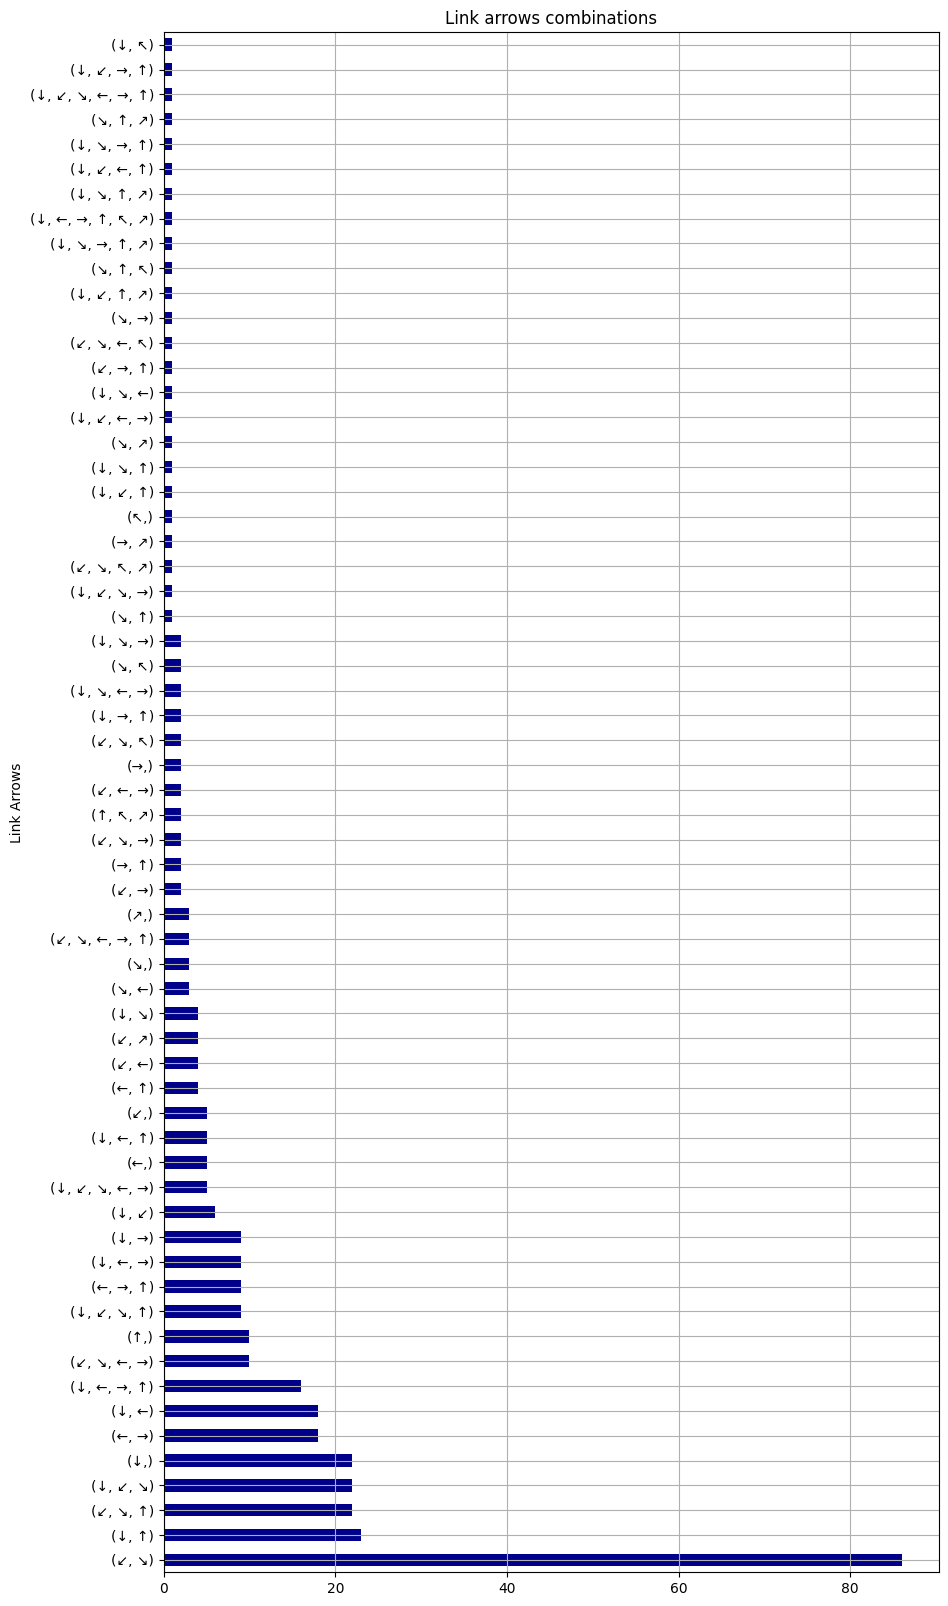

In [63]:
arrows_colors = colors_dict["Link Monster"]
monster_df["Link Arrows"].value_counts().plot.barh(
    figsize=(10, 20), grid=True, color=arrows_colors, title="Link arrows combinations"
)
plt.show()

#### By unique

In [64]:
monster_df[monster_df["Link Arrows"].notna()].drop(
    columns=[
        "Card type",
        "Primary type",
        "Level/Rank",
        "Pendulum Scale",
        "Secondary type",
        "DEF",
        "Page name",
        "Page URL",
    ]
).explode("Link Arrows").groupby("Link Arrows").nunique()

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link Arrows                                                                     
←             119       112          49          6            21           35   
↑             121       117          47          6            20           31   
→             105        98          42          6            20           30   
↓             168       162          72          6            20           42   
↖              12        12           6          5             5            7   
↗              17        17           8          5             7            8   
↘             191       187         104          6            22           36   
↙             194       190         105          6            22           37   

             Link  ATK  TCG status  OCG status  Artwork  Modification date  \
Link Arrows                                                                  
←               6   29           4           4        3                119   
↑               6   27           3           4        3                121   
→               6   27           3           4        2                105   
↓               6   32           3           4        3                167   
↖               5   10           1           1        2                 12   
↗               6   11           1           1        2                 17   
↘               6   33           3           5        3                191   
↙               6   34           3           5        3                194   

             Errata  
Link Arrows          
←                 1  
↑                 2  
→                 1  
↓                 1  
↖                 1  
↗                 1  
↘                 3  
↙                 3

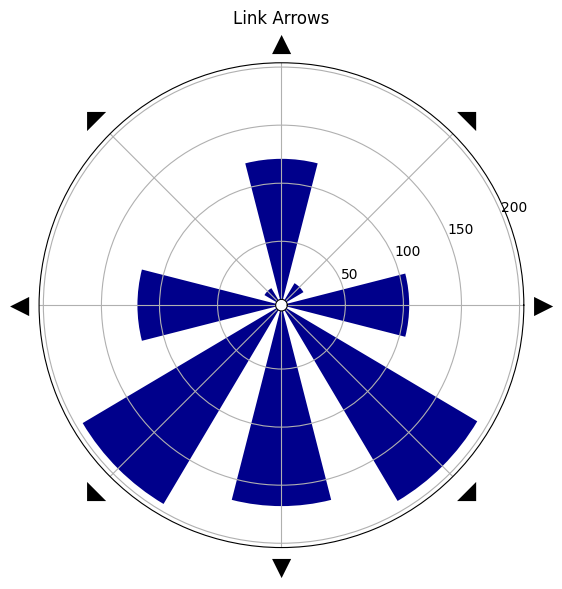

In [65]:
arrow_plot(monster_df["Link Arrows"].explode("Link Arrows"))

#### By link

In [66]:
arrow_per_link = monster_df[["Link Arrows", "Link"]].explode("Link Arrows").dropna()
arrow_crosstab = pd.crosstab(arrow_per_link["Link Arrows"], arrow_per_link["Link"])
arrow_crosstab

Link          1    2   3   4  5  6
Link Arrows                       
←             5   47  26  31  8  2
↑            10   30  45  30  4  2
→             2   33  27  32  9  2
↓            22   61  43  34  6  2
↖             1    3   5   2  0  1
↗             3    6   3   3  1  1
↘             3   98  54  26  9  1
↙             5  102  52  26  8  1

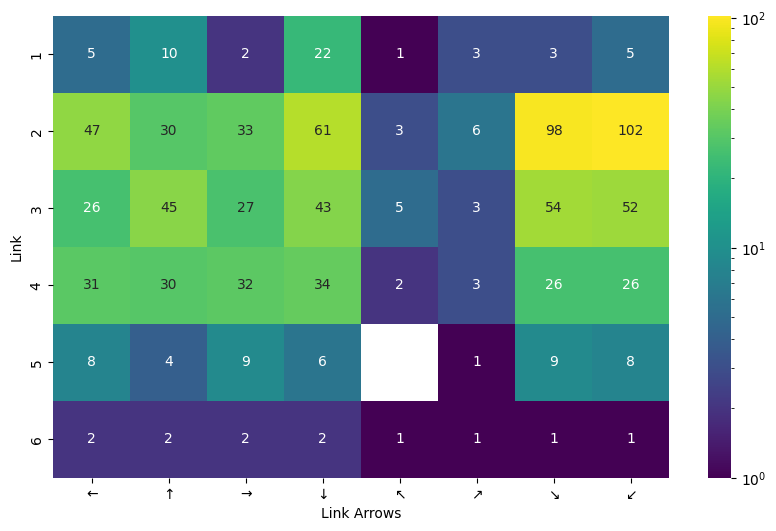

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    arrow_crosstab[arrow_crosstab > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

## Spell & Trap

### Properties

In [68]:
print("Total number of properties:", st_df["Property"].nunique())

Total number of properties:

9

In [69]:
st_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby("Property").nunique()

Name  Password  Archseries  Effect type  TCG status  \
Property                                                                     
Continuous Spell Card   430       426         165           56           4   
Continuous Trap Card    506       496         167           65           4   
Counter Trap Card       160       158          63           19           2   
Equip Spell Card        267       266          76           38           2   
Field Spell Card        282       279         148           36           5   
Normal Spell Card       945       943         238           44           4   
Normal Trap Card       1197      1190         248           48           5   
Quick-Play Spell Card   451       444         145           33           3   
Ritual Spell Card        77        77          26            8           1   

                       OCG status  Artwork  Modification date  Errata  
Property                                                               
Continuous Spell Card           5        2                428       4  
Continuous Trap Card            4        1                505       4  
Counter Trap Card               2        1                160       3  
Equip Spell Card                3        1                267       4  
Field Spell Card                4        1                283       4  
Normal Spell Card               6        3                946       4  
Normal Trap Card                5        2               1195       3  
Quick-Play Spell Card           4        1                450       4  
Ritual Spell Card               1        1                 77       3

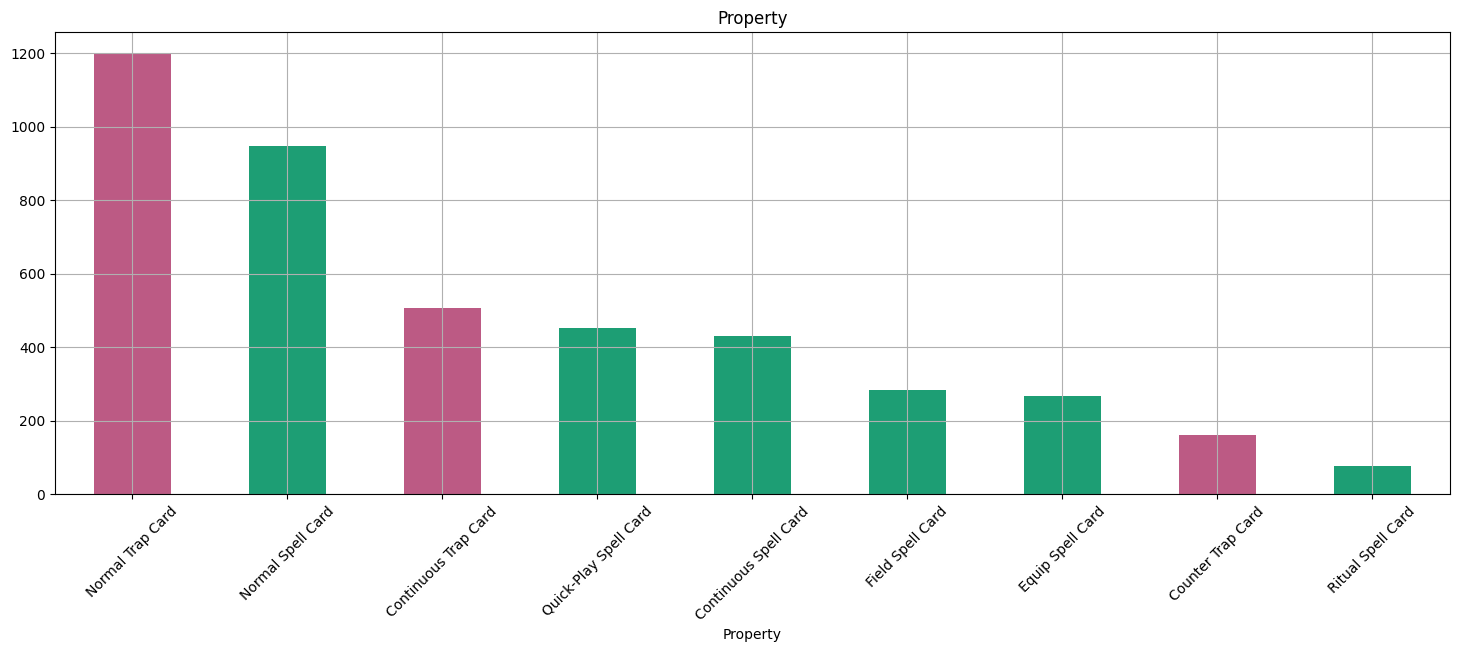

In [70]:
st_colors = [
    colors_dict[i]
    for i in cards_df[["Card type", "Property"]]
    .value_counts()
    .index.get_level_values(0)
]
st_df["Property"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=45, color=st_colors, title="Property"
)
plt.show()

### Effect type

In [71]:
print("Total number of effect types:", st_df["Effect type"].explode().nunique())

Total number of effect types:

14

In [72]:
st_df.explode("Effect type").groupby("Effect type").nunique()

Name  Password  Card type  Property  Archseries  \
Effect type                                                               
Activation condition     824       817          2         8         172   
Condition               1774      1747          2         9         395   
Continuous Effect         21        21          2         6          12   
Continuous-like Effect   917       907          2         7         241   
Cost                     444       442          2         7         115   
Effect                  3031      3007          2         9         449   
Ignition Effect            2         2          2         2           2   
Ignition-like Effect     469       461          1         6         194   
Lingering effect          96        96          2         6          42   
Maintenance cost          22        22          2         5           7   
Quick Effect              10        10          2         3           4   
Quick-like Effect        364       358          2         4         156   
Trigger Effect           865       858          2         9         268   
Unclassified effect       87        86          2         9          50   

                        TCG status  OCG status  Page name  Page URL  Artwork  \
Effect type                                                                    
Activation condition             5           5        824       824        2   
Condition                        6           5       1775      1775        2   
Continuous Effect                2           1         21        21        1   
Continuous-like Effect           5           5        918       918        2   
Cost                             4           4        444       444        2   
Effect                           6           6       3032      3032        3   
Ignition Effect                  1           1          2         2        0   
Ignition-like Effect             3           5        469       469        2   
Lingering effect                 3           3         96        96        1   
Maintenance cost                 2           2         22        22        1   
Quick Effect                     1           1         10        10        0   
Quick-like Effect                5           4        364       364        1   
Trigger Effect                   5           4        865       865        1   
Unclassified effect              2           3         87        87        1   

                        Modification date  Errata  
Effect type                                        
Activation condition                  823       4  
Condition                            1767       4  
Continuous Effect                      21       2  
Continuous-like Effect                917       4  
Cost                                  444       4  
Effect                               3021       4  
Ignition Effect                         2       1  
Ignition-like Effect                  468       3  
Lingering effect                       96       3  
Maintenance cost                       22       2  
Quick Effect                           10       2  
Quick-like Effect                     364       2  
Trigger Effect                        863       4  
Unclassified effect                    87       1

#### Spell & Trap discrimination

In [73]:
st_diff = (
    st_df[["Card type", "Effect type"]]
    .explode("Effect type")
    .value_counts()
    .unstack(0)
    .fillna(0)
    .astype(int)
)
st_diff

Card type               Spell Card  Trap Card
Effect type                                  
Activation condition           242        582
Condition                     1197        578
Continuous Effect                7         14
Continuous-like Effect         630        288
Cost                           235        209
Effect                        1587       1445
Ignition Effect                  1          1
Ignition-like Effect           469          0
Lingering effect                56         40
Maintenance cost                11         11
Quick Effect                     4          6
Quick-like Effect                3        361
Trigger Effect                 585        280
Unclassified effect             65         22

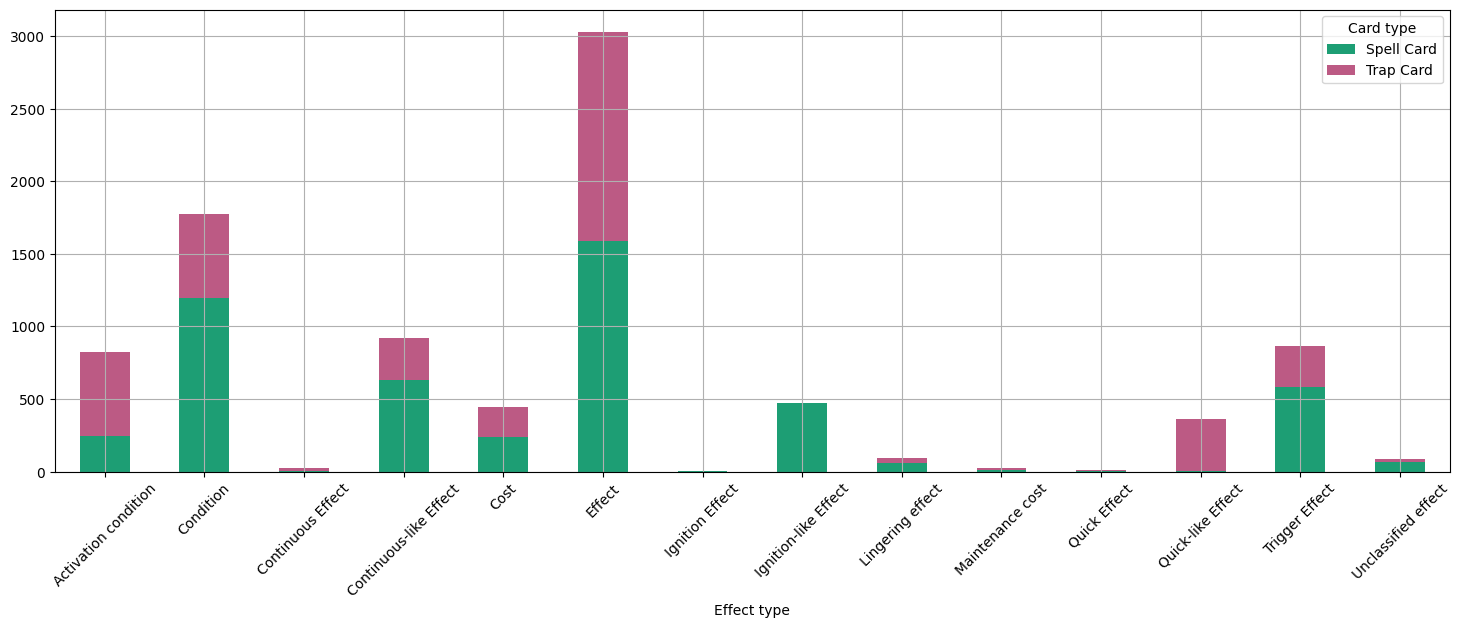

In [74]:
st_diff_colors = {
    "Spell Card": colors_dict["Spell Card"],
    "Trap Card": colors_dict["Trap Card"],
}
st_diff.plot.bar(figsize=(18, 6), stacked=True, grid=True, rot=45, color=st_diff_colors)
plt.show()

## Archseries

In [75]:
exploded_archseries = cards_df.explode("Archseries")
print("Total number of Archseries:", exploded_archseries["Archseries"].nunique())

Total number of Archseries:

732

In [76]:
exploded_archseries.groupby("Archseries").nunique()

Name  Password  Card type  Property  Effect type  \
Archseries                                                             
"C"                    9         9          1         0            7   
-Eyes Dragon          74        73          1         0           45   
/Assault Mode          7         7          1         0            5   
@Ignister             18        18          1         0            9   
A-to-Z                16        16          1         0            5   
...                  ...       ...        ...       ...          ...   
Zera                   9         9          2         1            7   
Zexal                 26        26          3         3           14   
Zombie counterpart    21        21          2         1           12   
Zoodiac               15        15          3         3            9   
Zubaba                 5         5          1         0            3   

                    TCG status  OCG status  Page name  Page URL  Artwork  \
Archseries                                                                 
"C"                          2           1          9         9        0   
-Eyes Dragon                 2           3         74        74        1   
/Assault Mode                1           1          7         7        0   
@Ignister                    1           1         18        18        0   
A-to-Z                       1           1         16        16        2   
...                        ...         ...        ...       ...      ...   
Zera                         1           1         10        10        0   
Zexal                        2           2         26        26        0   
Zombie counterpart           1           1         21        21        0   
Zoodiac                      3           3         15        15        1   
Zubaba                       1           1          5         5        0   

                    Modification date  Errata  Attribute  Primary type  \
Archseries                                                               
"C"                                 9       2          1             2   
-Eyes Dragon                       73       4          6             7   
/Assault Mode                       7       1          5             1   
@Ignister                          18       0          6             6   
A-to-Z                             16       3          1             3   
...                               ...     ...        ...           ...   
Zera                               10       2          3             4   
Zexal                              26       1          5             2   
Zombie counterpart                 21       2          5             3   
Zoodiac                            15       1          1             2   
Zubaba                              5       1          2             2   

                    Secondary type  Monster type  DEF  Pendulum Scale  Link  \
Archseries                                                                    
"C"                              0             1    8               0     0   
-Eyes Dragon                     2             3   14               7     1   
/Assault Mode                    0             6    6               0     0   
@Ignister                        1             1    9               0     3   
A-to-Z                           1             1   12               0     0   
...                            ...           ...  ...             ...   ...   
Zera                             0             4    3               0     0   
Zexal                            0             7   13               0     0   
Zombie counterpart               4             1    9               0     0   
Zoodiac                          0             1    6               0     0   
Zubaba                           0             1    5               0     0   

                    Link Arrows  ATK  Level/Rank  
Archseries                                        
"

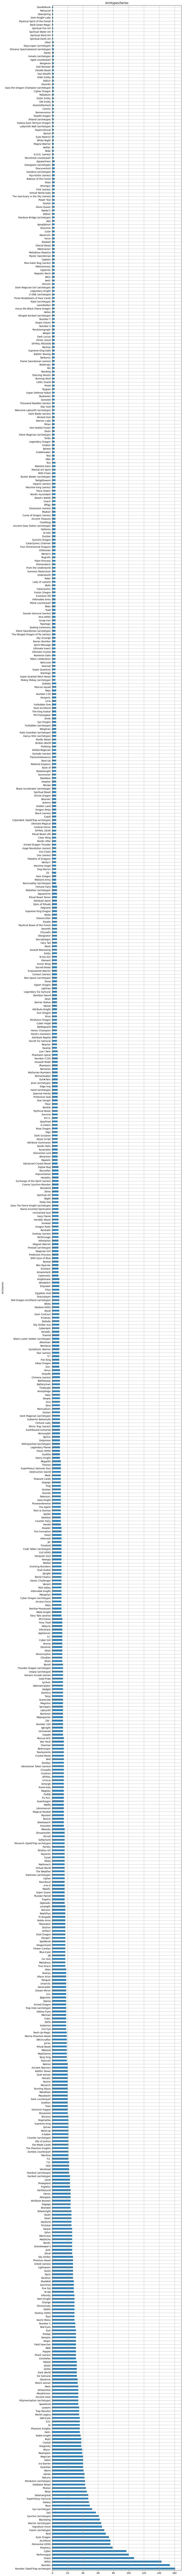

In [77]:
exploded_archseries["Archseries"].value_counts().plot.barh(
    figsize=(10, 200), grid=True, title="Archtypes/Series"
)
plt.show()

### By card type

In [78]:
archseries_crosstab = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Card type"], margins=True
)
archseries_crosstab

Card type           Monster Card  Spell Card  Trap Card   All
Archseries                                                   
"C"                            9           0          0     9
-Eyes Dragon                  74           0          0    74
/Assault Mode                  7           0          0     7
@Ignister                     18           0          0    18
A-to-Z                        16           0          0    16
...                          ...         ...        ...   ...
Zexal                         20           5          1    26
Zombie counterpart            19           0          2    21
Zoodiac                       12           1          2    15
Zubaba                         5           0          0     5
All                         7549        1430        952  9931

[733 rows x 4 columns]

### By primary type

In [79]:
archseries_crosstab_b = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Primary type"], margins=True
)
archseries_crosstab_b

Primary type        Effect Monster  Fusion Monster  Link Monster  \
Archseries                                                         
"C"                              8               0             0   
-Eyes Dragon                    31              12             1   
/Assault Mode                    7               0             0   
@Ignister                       10               1             4   
A-to-Z                           6               8             0   
...                            ...             ...           ...   
Zexal                           16               0             0   
Zombie counterpart               9               0             0   
Zoodiac                          6               0             0   
Zubaba                           4               0             0   
All                           4850             566           354   

Primary type        Normal Monster  Ritual Monster  Synchro Monster  \
Archseries                                                            
"C"                              1               0                0   
-Eyes Dragon                     3               4                5   
/Assault Mode                    0               0                0   
@Ignister                        0               1                1   
A-to-Z                           2               0                0   
...                            ...             ...              ...   
Zexal                            0               0                0   
Zombie counterpart               3               0                7   
Zoodiac                          0               0                0   
Zubaba                           0               0                0   
All                            221             128              463   

Primary type        Xyz Monster   All  
Archseries                             
"C"                           0     9  
-Eyes Dragon                 18    74  
/Assault Mode                 0     7  
@Ignister                     1    18  
A-to-Z                        0    16  
...                         ...   ...  
Zexal                         4    20  
Zombie counterpart            0    19  
Zoodiac                       6    12  
Zubaba                        1     5  
All                         963  7545  

[666 rows x 8 columns]



### By secondary type

In [80]:
exploded_archseries_secondary_type = exploded_archseries[
    ["Archseries", "Secondary type"]
].explode("Secondary type")
archseries_crosstab_c = pd.crosstab(
    exploded_archseries_secondary_type["Archseries"],
    exploded_archseries_secondary_type["Secondary type"],
    margins=True,
)
archseries_crosstab_c

Secondary type      Flip monster  Gemini monster  Spirit monster  \
Archseries                                                         
-Eyes Dragon                   0               2               0   
@Ignister                      0               0               0   
A-to-Z                         0               0               0   
Adamancipator                  0               0               0   
Alien                          1               1               0   
...                          ...             ...             ...   
X-Saber                        0               0               0   
Yang Zing                      0               0               0   
Yo-kai Girl                    0               0               0   
Zombie counterpart             1               1               1   
All                          129              28              13   

Secondary type      Toon monster  Tuner monster  Union monster  All  
Archseries                                                           
-Eyes Dragon                   2              0              0    4  
@Ignister                      0              1              0    1  
A-to-Z                         0              0              6    6  
Adamancipator                  0              3              0    3  
Alien                          0              1              0    3  
...                          ...            ...            ...  ...  
X-Saber                        0              4              0    4  
Yang Zing                      0              3              0    3  
Yo-kai Girl                    0              6              0    6  
Zombie counterpart             0              4              0    7  
All                           36            478             18  702  

[206 rows x 7 columns]

### By monster type

In [81]:
archseries_crosstab_d = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Monster type"], margins=True
)
archseries_crosstab_d

Monster type        Aqua  Beast  Beast-Warrior  Creator God  Cyberse  \
Archseries                                                             
"C"                    0      0              0            0        0   
-Eyes Dragon           0      0              0            0        0   
/Assault Mode          0      0              0            0        0   
@Ignister              0      0              0            0       18   
A-to-Z                 0      0              0            0        0   
...                  ...    ...            ...          ...      ...   
Zexal                  1      7              0            0        0   
Zombie counterpart     0      0              0            0        0   
Zoodiac                0      0             12            0        0   
Zubaba                 0      0              0            0        0   
All                  197    304            191            2      165   

Monster type        Dinosaur  Divine-Beast  Dragon  Fairy  Fiend  Fish  \
Archseries                                                               
"C"                        0             0       0      0      0     0   
-Eyes Dragon               0             0      69      0      0     0   
/Assault Mode              0             0       2      0      0     0   
@Ignister                  0             0       0      0      0     0   
A-to-Z                     0             0       0      0      0     0   
...                      ...           ...     ...    ...    ...   ...   
Zexal                      0             0       2      1      1     0   
Zombie counterpart         0             0       0      0      0     0   
Zoodiac                    0             0       0      0      0     0   
Zubaba                     0             0       0      0      0     0   
All                       93            12     748    465    726    76   

Monster type        Illusion  Insect  Machine  Plant  Psychic  Pyro  Reptile  \
Archseries                                                                     
"C"                        0       9        0      0        0     0        0   
-Eyes Dragon               0       0        2      0        0     0        0   
/Assault Mode              0       0        1      0        1     0        0   
@Ignister                  0       0        0      0        0     0        0   
A-to-Z                     0       0       16      0        0     0        0   
...                      ...     ...      ...    ...      ...   ...      ...   
Zexal                      0       0        0      0        0     0        0   
Zombie counterpart         0       0        0      0        0     0        0   
Zoodiac                    0       0        0      0        0     0        0   
Zubaba                     0       0        0      0        0     0        0   
All                        3     165     1031    184      159   104      142   

Monster type        Rock  Sea Serpent  Spellcaster  Thunder  Warrior  \
Archseries                                                             
"C"                    0            0            0        0        0   
-Eyes Dragon           0            0            0        0        0   
/Assault Mode          0            0            1        0        1   
@Ignister              0            0            0        0        0   
A-to-Z                 0            0            0        0        0   
...                  ...          ...          ...      ...      ...   
Zexal                  0            0            0        0        6   
Zombie counterpart     0            0            0        0        0   
Zoodiac                0            0            0        0        0   
Zubaba                 0            0            0        0        5   
All                  221           71          596      100     1284   

Monster type        Winged Beast  Wyrm  Zombie   All  
Archseries                                            
"C"         

### By property

In [82]:
archseries_crosstab_e = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Property"], margins=True
)
archseries_crosstab_e

Property            Continuous Spell Card  Continuous Trap Card  \
Archseries                                                        
A.I.                                    1                     3   
Abyss Actor                             0                     0   
Abyss Script                            1                     0   
Abyss-                                  0                     1   
Adamancipator                           0                     0   
...                                   ...                   ...   
Zera                                    0                     0   
Zexal                                   0                     0   
Zombie counterpart                      0                     2   
Zoodiac                                 1                     1   
All                                   255                   299   

Property            Counter Trap Card  Equip Spell Card  Field Spell Card  \
Archseries                                                                  
A.I.                                0                 0                 1   
Abyss Actor                         0                 0                 0   
Abyss Script                        0                 0                 0   
Abyss-                              0                 3                 0   
Adamancipator                       1                 0                 1   
...                               ...               ...               ...   
Zera                                0                 0                 0   
Zexal                               0                 0                 1   
Zombie counterpart                  0                 0                 0   
Zoodiac                             0                 0                 0   
All                                84               138               188   

Property            Normal Spell Card  Normal Trap Card  \
Archseries                                                
A.I.                                4                 1   
Abyss Actor                         1                 2   
Abyss Script                        5                 0   
Abyss-                              0                 3   
Adamancipator                       2                 1   
...                               ...               ...   
Zera                                0                 0   
Zexal                               4                 1   
Zombie counterpart                  0                 0   
Zoodiac                             0                 1   
All                               533               569   

Property            Quick-Play Spell Card  Ritual Spell Card   All  
Archseries                                                          
A.I.                                    2                  1    13  
Abyss Actor                             0                  0     3  
Abyss Script                            1                  0     7  
Abyss-                                  0                  0     7  
Adamancipator                           0                  0     5  
...                                   ...                ...   ...  
Zera                                    0                  1     1  
Zexal                                   0                  0     6  
Zombie counterpart                      0                  0     2  
Zoodiac                                 0                  0     3  
All                                   275                 41  2382  

[412 rows x 10 columns]

## Artworks

In [83]:
print(
    "Total number of cards with edited or alternate artworks:",
    cards_df["Artwork"].count(),
)

Total number of cards with edited or alternate artworks:

635

In [84]:
cards_df[["Name", "Password", "TCG status", "OCG status", "Artwork"]][
    cards_df["Artwork"].notna()
]

Name  Password TCG status OCG status    Artwork
17           A Deal with Dark Ruler  06850209  Unlimited  Unlimited  (Edited,)
31      A-to-Z-Dragon Buster Cannon  65172015  Unlimited  Unlimited  (Edited,)
50                     Absolute End  27744077  Unlimited  Unlimited  (Edited,)
56       Absorbing Kid from the Sky  49771608  Unlimited  Unlimited  (Edited,)
66     Abyss Actor - Mellow Madonna  78310590  Unlimited  Unlimited  (Edited,)
...                             ...       ...        ...        ...        ...
12335         Yorishiro of the Aqua  57511992  Unlimited  Unlimited  (Edited,)
12448                       Zombino  14575467  Unlimited  Unlimited  (Edited,)
12450              Zombyra the Dark  88472456  Unlimited  Unlimited  (Edited,)
12452               Zoodiac Barrage  46060017  Forbidden    Limited  (Edited,)
12455            Zoodiac Bunnyblast  04367330  Unlimited  Unlimited  (Edited,)

[635 rows x 5 columns]

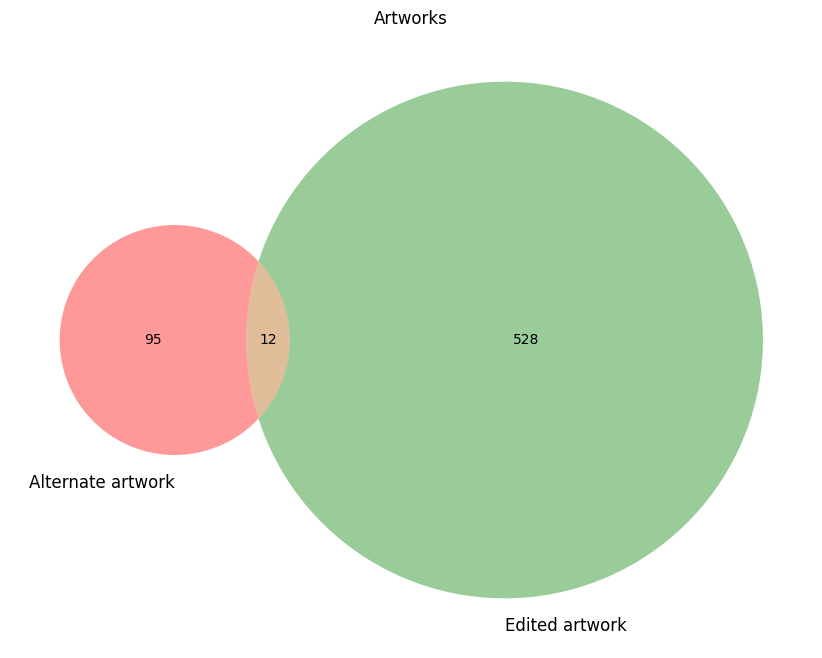

In [85]:
artwork_value_counts = cards_df["Artwork"].value_counts()
plt.figure(figsize=(20, 8))
plt.title("Artworks")
venn2(
    subsets=(
        artwork_value_counts[("Alternate",)],
        artwork_value_counts[("Edited",)],
        artwork_value_counts[("Alternate", "Edited")],
    ),
    set_labels=("Alternate artwork", "Edited artwork"),
)
plt.show()

### By card type

In [86]:
artwork_crosstab = pd.crosstab(cards_df["Artwork"], cards_df["Card type"])
artwork_crosstab

Card type            Monster Card  Spell Card  Trap Card
Artwork                                                 
(Alternate,)                   83           7          5
(Alternate, Edited)            11           1          0
(Edited,)                     299         119        110

### By primary type

In [87]:
artwork_crosstab_b = pd.crosstab(cards_df["Artwork"], cards_df["Primary type"])
artwork_crosstab_b

Primary type         Effect Monster  Fusion Monster  Link Monster  \
Artwork                                                             
(Alternate,)                     36              13             9   
(Alternate, Edited)               3               1             5   
(Edited,)                       195              23            10   

Primary type         Normal Monster  Ritual Monster  Synchro Monster  \
Artwork                                                                
(Alternate,)                     16               0                4   
(Alternate, Edited)               2               0                0   
(Edited,)                        43               7                5   

Primary type         Xyz Monster  
Artwork                           
(Alternate,)                   5  
(Alternate, Edited)            0  
(Edited,)                     16

More granularity is unnecessary

## Errata

In [88]:
print("Total number of cards with errata:", cards_df["Errata"].count())

Total number of cards with errata:

4776

In [89]:
cards_df[["Name", "Password", "TCG status", "OCG status", "Errata"]][
    cards_df["Errata"].notna()
]

Name  Password TCG status OCG status   Errata
0          "A" Cell Breeding Device  34541863  Unlimited  Unlimited  (Name,)
5      "Infernoble Arms - Durendal"  37478723  Unlimited  Unlimited   (Any,)
9                    3-Hump Lacooda  86988864  Unlimited  Unlimited   (Any,)
11        4-Starred Ladybug of Doom  83994646  Unlimited  Unlimited   (Any,)
14                      7 Completed  86198326  Unlimited  Unlimited  (Type,)
...                             ...       ...        ...        ...      ...
12462                Zoodiac Ramram  04145852  Unlimited  Unlimited   (Any,)
12466              Zoodiac Whiptail  31755044  Unlimited  Unlimited   (Any,)
12469                 Zubaba Buster  57036718  Unlimited  Unlimited   (Any,)
12471                 Zubaba Knight  97896503  Unlimited  Unlimited   (Any,)
12474    Zure, Knight of Dark World  07459013  Unlimited  Unlimited  (Type,)

[4776 rows x 5 columns]

In [90]:
errata_counts = (
    cards_df.groupby("Errata").nunique().sort_values("Name", ascending=False)
)
errata_counts

Name  Password  Card type  Property  Archseries  Effect type  \
Errata                                                                       
(Any,)        3486      3481          3         9         629          217   
(Type,)        786       786          3         9         188           82   
(Name,)        379       379          3         9         127           71   
(Name, Type)   117       116          3         6          58           36   

              TCG status  OCG status  Page name  Page URL  Artwork  \
Errata                                                               
(Any,)                 5           5       3488      3488        3   
(Type,)                4           5        788       788        3   
(Name,)                4           3        379       379        2   
(Name, Type)           5           4        121       121        3   

              Modification date  Attribute  Primary type  Secondary type  \
Errata                                                                     
(Any,)                     3466          7             7               8   
(Type,)                     788          7             7               6   
(Name,)                     379          6             7               3   
(Name, Type)                121          7             6               5   

              Monster type  DEF  Pendulum Scale  Link  Link Arrows  ATK  \
Errata                                                                    
(Any,)                  24   59               9     4           10   69   
(Type,)                 24   46               5     2            2   57   
(Name,)                 22   37               3     1            1   43   
(Name, Type)            18   31               0     0            0   36   

              Level/Rank  
Errata                    
(Any,)                13  
(Type,)               12  
(Name,)               11  
(Name, Type)          10

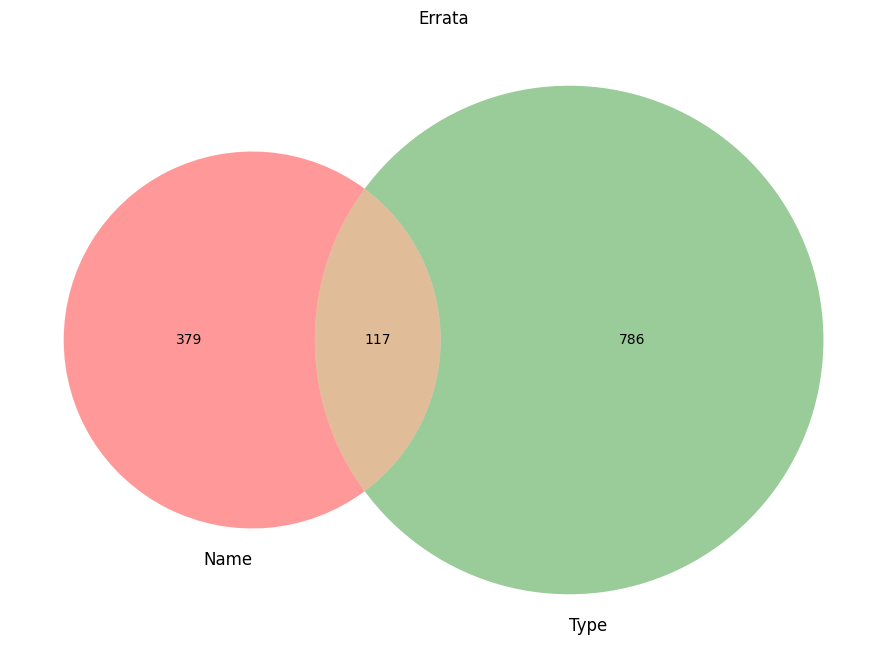

In [91]:
plt.figure(figsize=(20, 8))
plt.title("Errata")
sorted_errata_name_counts = (
    errata_counts["Name"]
    .drop(("Any",))
    .sort_index(key=lambda x: [(len(i), i) for i in x])
)
venn2(
    subsets=sorted_errata_name_counts,
    set_labels=sorted_errata_name_counts.index[:-1].str[0],
)
plt.show()

### By card type

In [92]:
errata_crosstab = pd.crosstab(cards_df["Errata"], cards_df["Card type"])
errata_crosstab.sort_values(by=errata_crosstab.columns.tolist(), ascending=False)

Card type     Monster Card  Spell Card  Trap Card
Errata                                           
(Any,)                2165         680        643
(Type,)                562         216         10
(Name,)                274          54         51
(Name, Type)           101          19          1

### By primary type

In [93]:
errata_crosstab_b = pd.crosstab(cards_df["Errata"], cards_df["Primary type"])
errata_crosstab_b.sort_values(by=errata_crosstab_b.columns.tolist(), ascending=False)

Primary type  Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Errata                                                                       
(Any,)                  1650             129            15              30   
(Type,)                  331              29             2             150   
(Name,)                  185              46             4              21   
(Name, Type)              46               9             0              35   

Primary type  Ritual Monster  Synchro Monster  Xyz Monster  
Errata                                                      
(Any,)                    36              138          167  
(Type,)                    3               29           17  
(Name,)                    2                9            7  
(Name, Type)               3                5            1

More granularity is unnecessary

### By artwork

In [94]:
errata_crosstab_c = pd.crosstab(cards_df["Artwork"], cards_df["Errata"])
errata_crosstab_c.sort_values(by=errata_crosstab_c.columns.tolist(), ascending=False)

Errata               (Any,)  (Name,)  (Name, Type)  (Type,)
Artwork                                                    
(Edited,)               176       21            17       64
(Alternate,)             32        4            18       27
(Alternate, Edited)       1        0             2        3

## TCG & OCG status

### TGC status

In [95]:
print("Total number of TCG status:", cards_df["TCG status"].nunique())

Total number of TCG status:

6

In [96]:
cards_df.drop(columns=["Page name", "Page URL"]).groupby(
    "TCG status", dropna=False
).nunique()

Name  Password  Card type  Property  Archseries  \
TCG status                                                           
Forbidden           105       105          3         7          58   
Illegal              38         0          3         3           6   
Limited              79        79          3         6          43   
Not yet released      6         6          2         2           0   
Semi-Limited          8         8          2         3           7   
Unlimited         11845     11842          3         9        1203   
NaN                 393       325          3         8          95   

                  Effect type  OCG status  Artwork  Modification date  Errata  \
TCG status                                                                      
Forbidden                  49           4        1                105       4   
Illegal                     6           1        0                 38       3   
Limited                    37           4        3                 79       4   
Not yet released            5           1        0                  6       0   
Semi-Limited                8           2        1                  8       3   
Unlimited                 355           4        3              11787       4   
NaN                        72           3        0                393       2   

                  Attribute  Primary type  Secondary type  Monster type  DEF  \
TCG status                                                                     
Forbidden                 6             5               2            19   20   
Illegal                   6             5               0            14   12   
Limited                   6             6               2            15   18   
Not yet released          3             3               0             3    3   
Semi-Limited              3             1               1             3    3   
Unlimited                 7             7               8            24   75   
NaN                       7             7               2            24   37   

                  Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
TCG status                                                            
Forbidden                      2     4           11   28          12  
Illegal                        2     2            2   11           5  
Limited                        2     1            1   23           9  
Not yet released               0     0            0    3           3  
Semi-Limited                   0     0            0    3           3  
Unlimited                     14     6           61   80          14  
NaN                            4     4            6   54          12

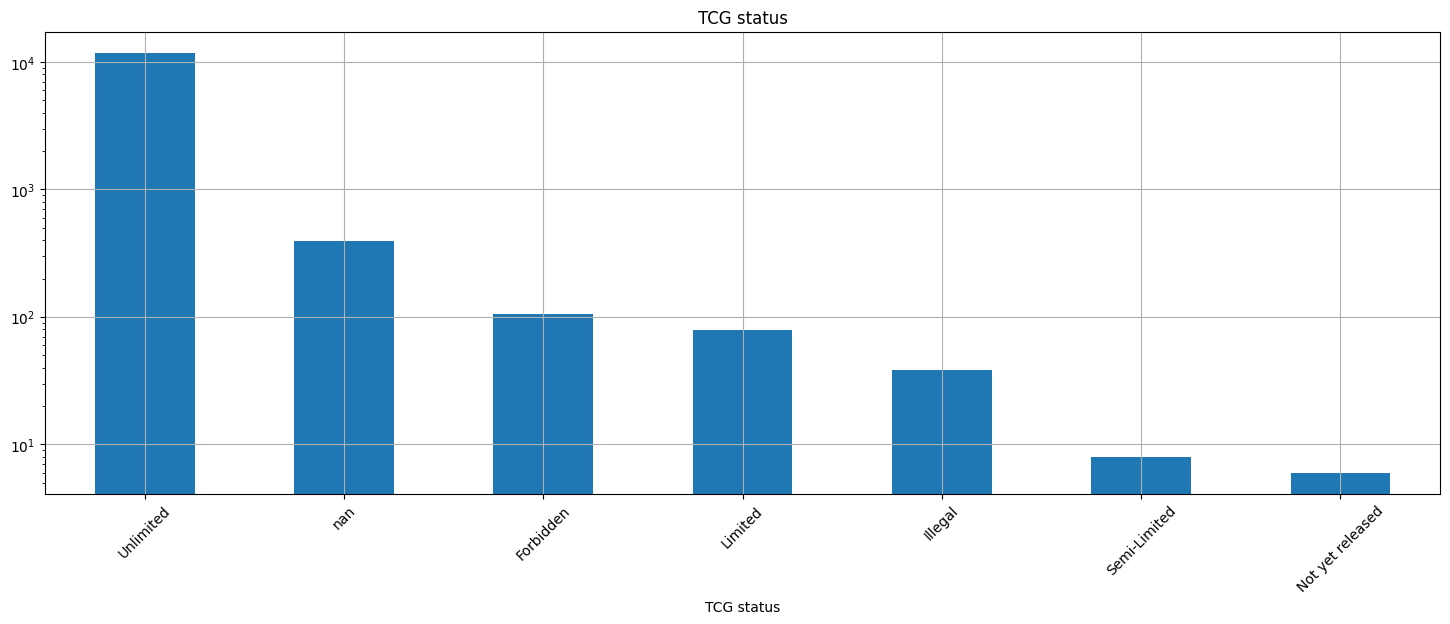

In [97]:
cards_df["TCG status"].value_counts(dropna=False).plot.bar(
    figsize=(18, 6), logy=True, grid=True, rot=45, title="TCG status"
)
plt.show()

#### By card type

In [98]:
# Remove unlimited
tcg_crosstab = pd.crosstab(cards_df["Card type"], cards_df["TCG status"]).drop(
    ["Unlimited"], axis=1
)
tcg_crosstab

TCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         67       35       45                 3             3
Spell Card           26        2       31                 0             5
Trap Card            12        1        3                 3             0

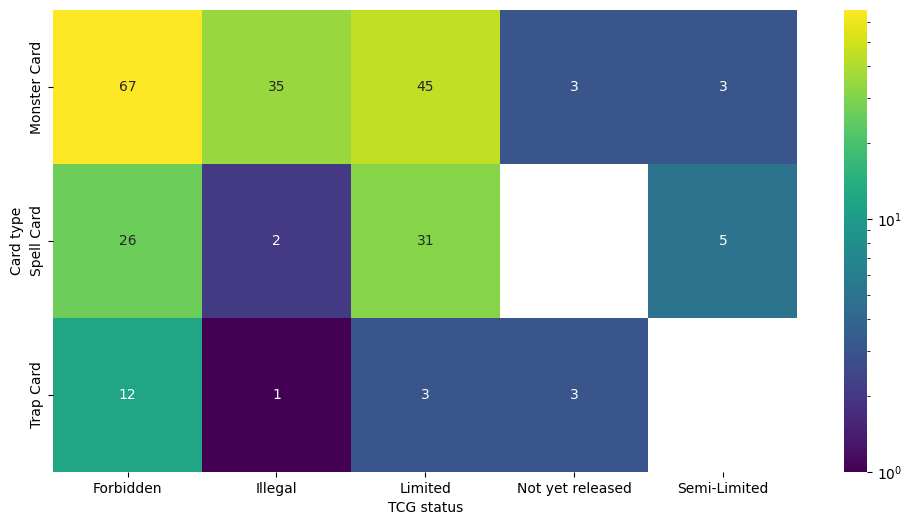

In [99]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    tcg_crosstab[tcg_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    norm=mc.LogNorm(),
)
plt.show()

#### By monster type

In [100]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(cards_df["Monster type"], cards_df["TCG status"]).drop(
    ["Unlimited"], axis=1
)
tcg_crosstab_b

TCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   2        0        4                 0             0
Beast                  0        3        2                 0             0
Beast-Warrior          2        3        2                 0             0
Cyberse                2        0        2                 0             0
Dinosaur               0        0        2                 0             0
Divine-Beast           0        3        0                 0             0
Dragon                 9        3        7                 1             0
Fairy                  4        4        5                 0             1
Fiend                  5        2        2                 0             0
Fish                   1        0        0                 0             0
Illusion               0        0        0                 1             0
Insect                 2        0        0                 0             0
Machine                8        4        2                 0             0
Plant                  5        1        0                 0             0
Psychic                3        1        2                 0             1
Pyro                   0        0        0                 0             0
Reptile                1        0        1                 1             0
Rock                   2        1        4                 0             0
Sea Serpent            1        0        0                 0             0
Spellcaster            8        5        7                 0             0
Thunder                2        1        0                 0             0
Warrior                4        2        2                 0             1
Winged Beast           3        2        0                 0             0
Wyrm                   3        0        1                 0             0
Zombie                 0        0        0                 0             0

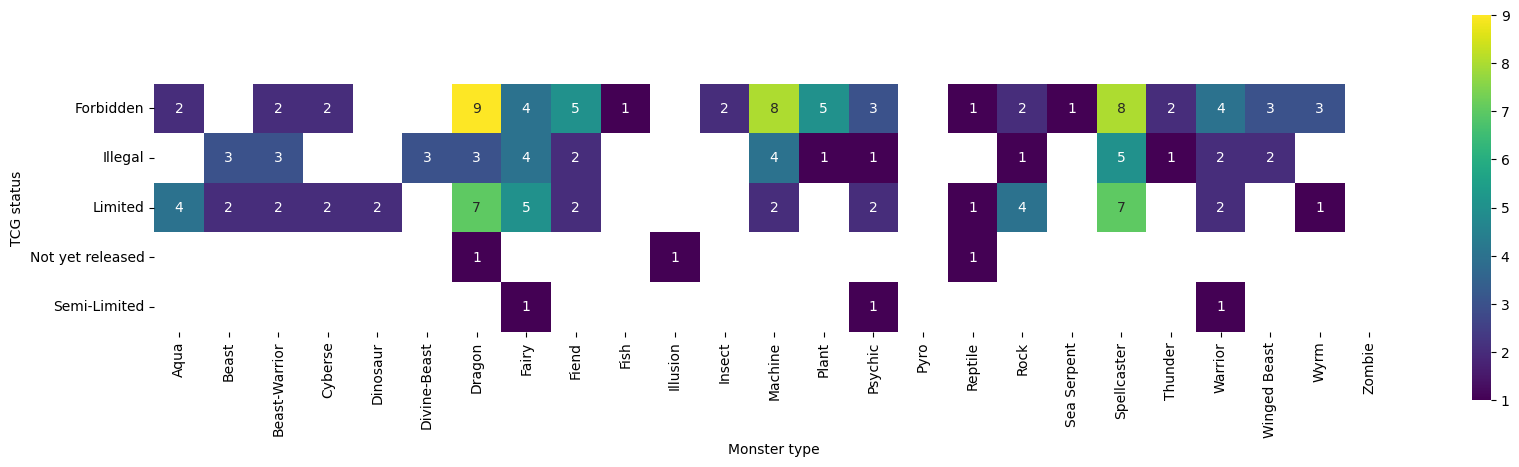

In [101]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    tcg_crosstab_b[tcg_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By archseries

In [102]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(
    exploded_archseries["Archseries"].where(
        exploded_archseries["OCG status"] != "Unlimited"
    ),
    exploded_archseries["TCG status"],
    margins=True,
)
tcg_crosstab_c

TCG status                 Forbidden  Illegal  Limited  Semi-Limited  \
Archseries                                                             
-Eyes Dragon                       1        0        0             0   
Adventurer Token (series)          0        0        0             0   
Amazoness                          0        0        0             0   
Attribute Knight                   0        0        1             0   
Barrier Statue                     1        0        0             0   
...                              ...      ...      ...           ...   
X-Saber                            1        0        0             0   
Xyz (archetype)                    0        0        0             0   
Zexal                              1        0        0             0   
Zoodiac                            3        0        1             0   
All                               63       39       36             8   

TCG status                 Unlimited  All  
Archseries                                 
-Eyes Dragon                       0    1  
Adventurer Token (series)          2    2  
Amazoness                          1    1  
Attribute Knight                   0    1  
Barrier Statue                     0    1  
...                              ...  ...  
X-Saber                            0    1  
Xyz (archetype)                    1    1  
Zexal                              0    1  
Zoodiac                            0    4  
All                               94  240  

[113 rows x 6 columns]

### OCG status

In [103]:
print("Total number of OCG status:", cards_df["OCG status"].nunique())

Total number of OCG status:

6

In [104]:
cards_df.drop(columns=["Page name", "Page URL"]).groupby(
    "OCG status", dropna=False
).nunique()

Name  Password  Card type  Property  Archseries  \
OCG status                                                           
Forbidden            88        88          3         6          46   
Illegal              32         1          3         2           8   
Limited              81        81          3         7          43   
Not yet released     39         1          3         6          19   
Semi-Limited         19        19          2         4          12   
Unlimited         12140     12116          3         9        1214   
NaN                  71        59          3         6          11   

                  Effect type  TCG status  Artwork  Modification date  Errata  \
OCG status                                                                      
Forbidden                  41           3        1                 88       4   
Illegal                     8           1        0                 32       3   
Limited                    39           4        3                 81       3   
Not yet released           23           0        0                 39       0   
Semi-Limited               13           4        2                 19       3   
Unlimited                 359           4        3              12087       4   
NaN                        25           2        0                 71       2   

                  Attribute  Primary type  Secondary type  Monster type  DEF  \
OCG status                                                                     
Forbidden                 6             5               3            19   19   
Illegal                   6             6               1            12   15   
Limited                   6             6               2            15   22   
Not yet released          6             4               1            13   13   
Semi-Limited              3             2               1             5    5   
Unlimited                 7             7               8            26   76   
NaN                       6             5               1            20   20   

                  Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
OCG status                                                            
Forbidden                      2     4            8   24          11  
Illegal                        2     2            2   14           8  
Limited                        3     1            1   21           9  
Not yet released               4     2            2   17           9  
Semi-Limited                   0     1            1    6           4  
Unlimited                     13     6           61   81          14  
NaN                            1     1            2   22          11

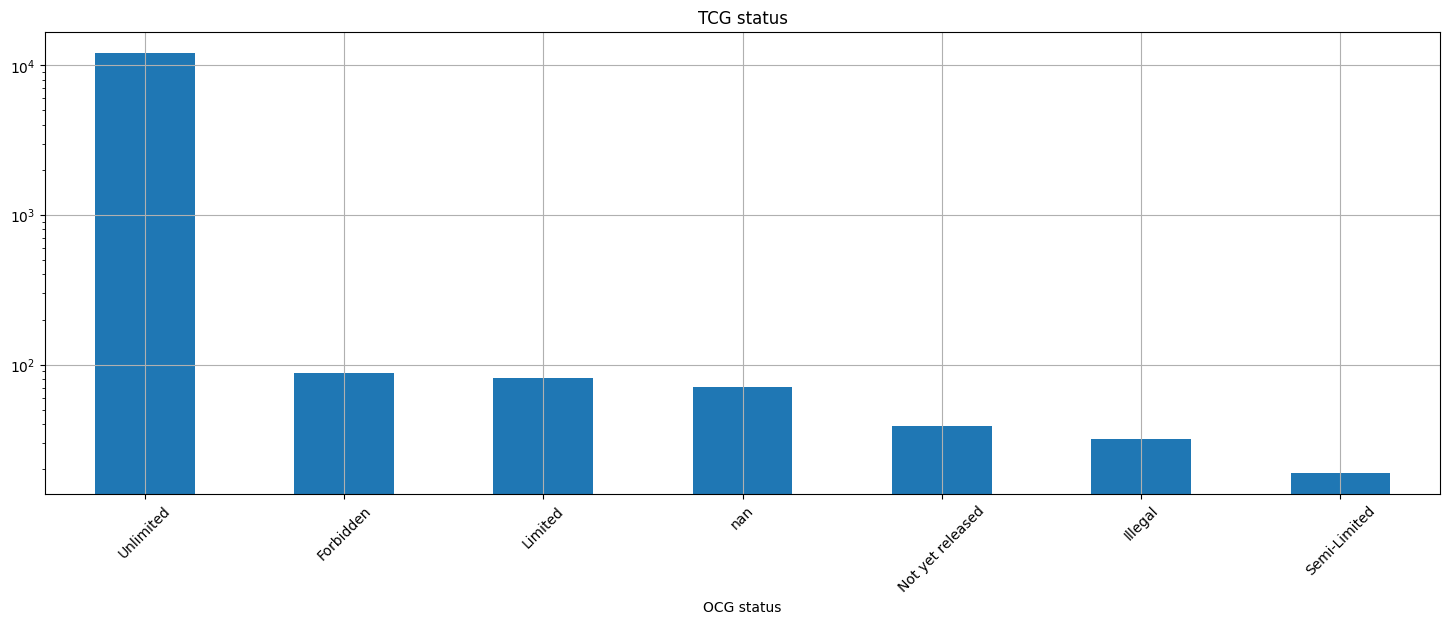

In [105]:
cards_df["OCG status"].value_counts(dropna=False).plot.bar(
    figsize=(18, 6), logy=True, grid=True, rot=45, title="TCG status"
)
plt.show()

#### By card type

In [106]:
# Remove unlimited
ocg_crosstab = pd.crosstab(cards_df["Card type"], cards_df["OCG status"]).drop(
    ["Unlimited"], axis=1
)
ocg_crosstab

OCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         56       30       47                22             7
Spell Card           22        1       30                10            12
Trap Card            10        1        4                 7             0

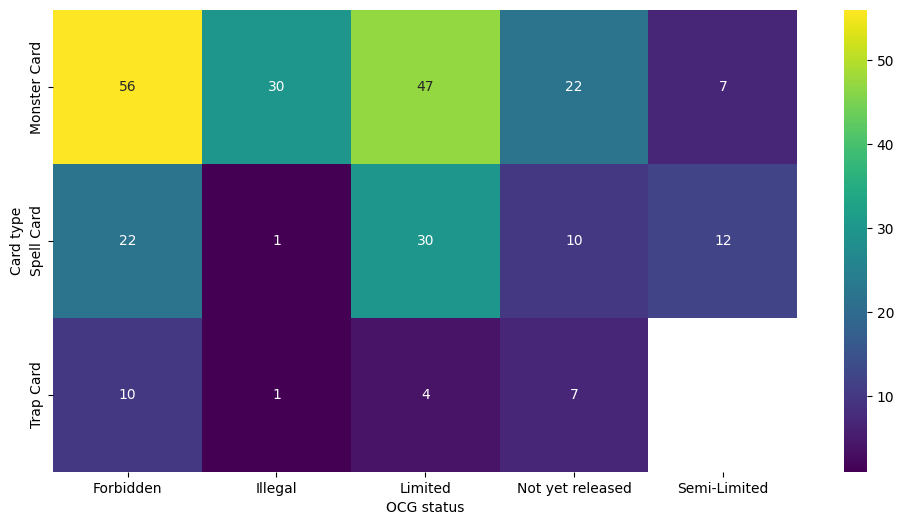

In [107]:
plt.figure(figsize=(12, 6))
sns.heatmap(ocg_crosstab[ocg_crosstab > 0], annot=True, fmt="g", cmap="viridis")
plt.show()

#### By monster type

In [108]:
ocg_crosstab_b = pd.crosstab(cards_df["Monster type"], cards_df["OCG status"]).drop(
    ["Unlimited"], axis=1
)
ocg_crosstab_b

OCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   3        0        3                 0             0
Beast                  0        2        1                 1             0
Beast-Warrior          3        2        1                 1             1
Creator God            0        0        0                 0             0
Cyberse                2        0        1                 0             0
Dinosaur               0        0        1                 1             0
Divine-Beast           0        3        0                 0             0
Dragon                 8        3        8                 2             0
Fairy                  2        3        6                 3             0
Fiend                  5        1        0                 0             0
Fish                   1        0        0                 0             0
Illusion               0        0        0                 0             0
Insect                 1        0        0                 0             0
Machine                7        3        5                 1             1
Plant                  4        0        2                 0             0
Psychic                2        1        4                 0             0
Pyro                   0        0        1                 1             0
Reptile                1        0        0                 1             0
Rock                   1        1        1                 0             2
Sea Serpent            1        0        0                 0             0
Spellcaster            7        7        8                 3             1
Thunder                1        0        3                 2             0
Warrior                2        3        2                 3             2
Winged Beast           3        1        0                 1             0
Wyrm                   2        0        0                 1             0
Zombie                 0        0        0                 0             0

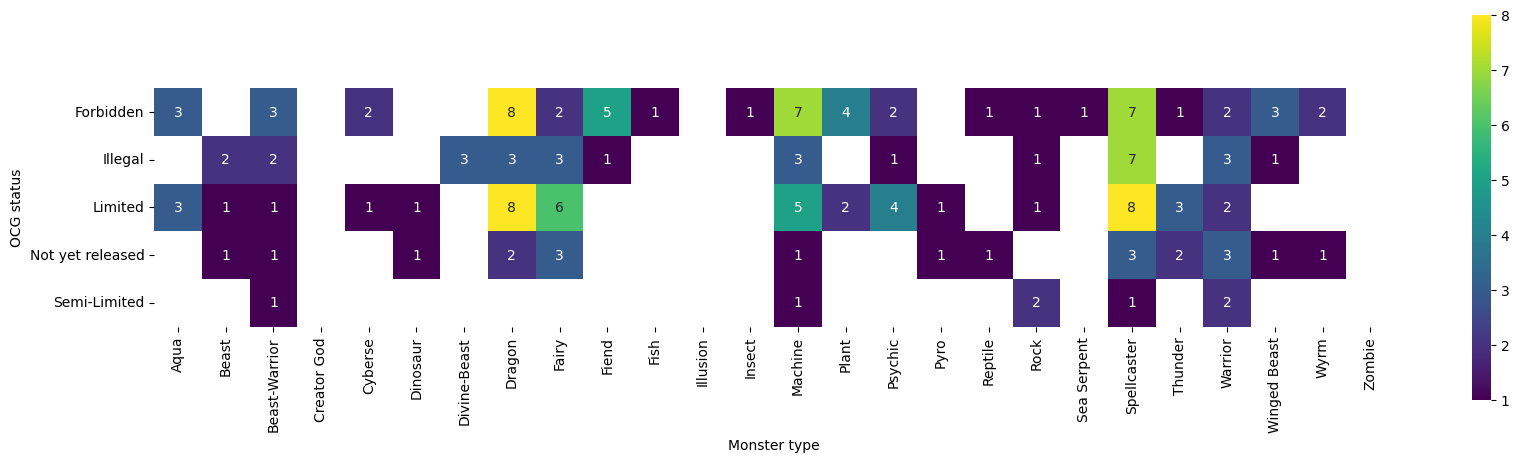

In [109]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    ocg_crosstab_b[ocg_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By archseries

In [110]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(
    exploded_archseries["Archseries"].where(
        exploded_archseries["OCG status"] != "Unlimited"
    ),
    exploded_archseries["OCG status"],
    margins=True,
)
ocg_crosstab_c

OCG status                 Forbidden  Illegal  Limited  Not yet released  \
Archseries                                                                 
-Eyes Dragon                       1        0        0                 1   
Abyss-                             0        0        0                 1   
Adventurer Token (series)          1        0        0                 0   
Amazoness                          1        0        0                 0   
Attribute Knight                   0        0        0                 0   
...                              ...      ...      ...               ...   
Xyz (archetype)                    0        0        0                 1   
ZEXAL shout                        0        3        0                 0   
Zexal                              1        0        0                 0   
Zoodiac                            2        0        2                 0   
All                               72       33       73                33   

OCG status                 Semi-Limited  All  
Archseries                                    
-Eyes Dragon                          0    2  
Abyss-                                0    1  
Adventurer Token (series)             1    2  
Amazoness                             0    1  
Attribute Knight                      1    1  
...                                 ...  ...  
Xyz (archetype)                       0    1  
ZEXAL shout                           0    3  
Zexal                                 0    1  
Zoodiac                               0    4  
All                                  13  224  

[122 rows x 6 columns]

### TCG vs. OCG status

In [111]:
cg_crosstab = pd.crosstab(
    cards_df["OCG status"], cards_df["TCG status"], dropna=False, margins=False
)
cg_crosstab

TCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited  \
OCG status                                                                  
Forbidden            72        0        3                 0             0   
Illegal               0       26        0                 0             0   
Limited               8        0       40                 0             4   
Semi-Limited          3        0        3                 0             4   
Unlimited            22        0       33                 6             0   

TCG status    Unlimited  
OCG status               
Forbidden            13  
Illegal               0  
Limited              29  
Semi-Limited          9  
Unlimited         11737

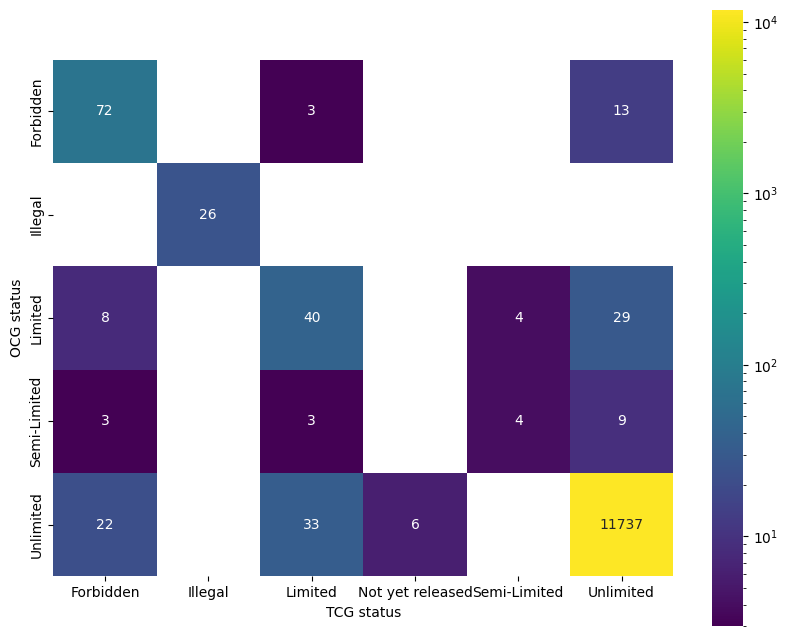

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    cg_crosstab[cg_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

# Extras

## Multiple secondary types

In [113]:
cards_df.dropna(subset="Secondary type", axis=0)[
    [len(x) > 1 for x in cards_df["Secondary type"].dropna()]
]

Name  Password     Card type Property  \
9394                   Scapeghost  67284107  Monster Card      NaN   
9561               Shaddoll Falco  37445295  Monster Card      NaN   
11189            Torque Tune Gear  79538761  Monster Card      NaN   
11403  Turbo-Tainted Hot Rod GT19  16769305  Monster Card      NaN   

                  Archseries  \
9394   (Zombie counterpart,)   
9561             (Shaddoll,)   
11189                    NaN   
11403                    NaN   

                                             Effect type TCG status  \
9394                                      (Flip effect,)  Unlimited   
9561            (Condition, Flip effect, Trigger Effect)  Unlimited   
11189  (Continuous-like Effect, Ignition Effect, Igni...  Unlimited   
11403          (Condition, Quick Effect, Trigger Effect)  Unlimited   

      OCG status                   Page name  \
9394   Unlimited                  Scapeghost   
9561   Unlimited              Shaddoll Falco   
11189  Unlimited            Torque Tune Gear   
11403  Unlimited  Turbo-Tainted Hot Rod GT19   

                                                Page URL Artwork  \
9394               https://yugipedia.com/wiki/Scapeghost     NaN   
9561           https://yugipedia.com/wiki/Shaddoll_Falco     NaN   
11189        https://yugipedia.com/wiki/Torque_Tune_Gear     NaN   
11403  https://yugipedia.com/wiki/Turbo-Tainted_Hot_R...     NaN   

        Modification date  Errata Attribute    Primary type  \
9394  2023-03-20 07:07:57  (Any,)      DARK  Effect Monster   
9561  2023-03-20 07:49:31  (Any,)      DARK  Effect Monster   
11189 2023-03-20 15:54:58  (Any,)     LIGHT  Effect Monster   
11403 2023-03-20 16:55:36     NaN      FIRE  Effect Monster   

                       Secondary type Monster type   DEF Pendulum Scale Link  \
9394    (Flip monster, Tuner monster)       Zombie     0            NaN  NaN   
9561    (Flip monster, Tuner monster)  Spellcaster  1400            NaN  NaN   
11189  (Tuner monster, Union monster)      Machine     0            NaN  NaN   
11403   (Flip monster, Tuner monster)      Machine  1500            NaN  NaN   

      Link Arrows  ATK Level/Rank  
9394          NaN    0          1  
9561          NaN  600          2  
11189         NaN    0          1  
11403         NaN  500          3

## Not yet released

In [114]:
cards_df.loc[cards_df["OCG status"] == "Not yet released"].loc[
    full_df["TCG status"] == "Not yet released"
]

Empty DataFrame
Columns: [Name, Password, Card type, Property, Archseries, Effect type, TCG status, OCG status, Page name, Page URL, Artwork, Modification date, Errata, Attribute, Primary type, Secondary type, Monster type, DEF, Pendulum Scale, Link, Link Arrows, ATK, Level/Rank]
Index: []

## Counters and Tokens

In [115]:
token_df.dropna(how="all", axis=1)

Name     Card type       Archseries Attribute  \
0     Albaz the Shrouded       Counter              NaN       NaN   
1     Albaz the Shrouded       Counter              NaN       NaN   
2    Aluber the Dogmatic       Counter              NaN       NaN   
3    Aluber the Dogmatic       Counter              NaN       NaN   
4     Ancient Gear Token  Monster Card  (Ancient Gear,)     EARTH   
..                   ...           ...              ...       ...   
121          Tri-Brigade       Counter              NaN       NaN   
122      Trickstar Token  Monster Card     (Trickstar,)     LIGHT   
123         Valley Token  Monster Card              NaN       NaN   
124        Wedge Counter       Counter              NaN       NaN   
125   World Legacy Token  Monster Card  (World Legacy,)      DARK   

      Primary type Monster type Effect type  DEF  ATK Level/Rank TCG status  \
0    Monster Token          NaN         NaN  NaN  NaN        NaN      Legal   
1              NaN          NaN         NaN  NaN  NaN        NaN      Legal   
2    Monster Token          NaN         NaN  NaN  NaN        NaN      Legal   
3              NaN          NaN         NaN  NaN  NaN        NaN      Legal   
4    Monster Token      Machine         NaN    0    0          1      Legal   
..             ...          ...         ...  ...  ...        ...        ...   
121            NaN          NaN         NaN  NaN  NaN        NaN      Legal   
122  Monster Token        Fairy         NaN    0    0          1      Legal   
123  Monster Token          NaN         NaN  NaN  NaN        NaN        NaN   
124            NaN          NaN         NaN  NaN  NaN        NaN        NaN   
125  Monster Token      Machine         NaN    0    0          1      Legal   

    OCG status             Page name  \
0        Legal    Albaz the Shrouded   
1        Legal    Albaz the Shrouded   
2        Legal   Aluber the Dogmatic   
3        Legal   Aluber the Dogmatic   
4        Legal    Ancient Gear Token   
..         ...                   ...   
121      Legal    Tri-Brigade (card)   
122      Legal       Trickstar Token   
123      Legal          Valley Token   
124      Legal  Wedge Counter (card)   
125      Legal    World Legacy Token   

                                            Page URL Artwork  \
0      https://yugipedia.com/wiki/Albaz_the_Shrouded     NaN   
1      https://yugipedia.com/wiki/Albaz_the_Shrouded     NaN   
2     https://yugipedia.com/wiki/Aluber_the_Dogmatic     NaN   
3     https://yugipedia.com/wiki/Aluber_the_Dogmatic     NaN   
4      https://yugipedia.com/wiki/Ancient_Gear_Token     NaN   
..                                               ...     ...   
121    https://yugipedia.com/wiki/Tri-Brigade_(card)     NaN   
122       https://yugipedia.com/wiki/Trickstar_Token     NaN   
123          https://yugipedia.com/wiki/Valley_Token     NaN   
124  https://yugipedia.com/wiki/Wedge_Counter_(card)     NaN   
125    https://yugipedia.com/wiki/World_Legacy_Token     NaN   

      Modification date Errata  
0   2023-03-23 09:39:57    NaN  
1   2023-03-23 09:39:57    NaN  
2   2023-03-23 09:40:16    NaN  
3   2023-03-23 09:40:16    NaN  
4   2023-03-23 09:40:39    NaN  
..                  ...    ...  
121 2023-03-23 12:43:32    NaN  
122 2023-03-15 01:01:38    NaN  
123 2019-11-23 11:52:36    NaN  
124 2019-12-08 00:39:31    NaN  
125 2023-03-23 12:49:00    NaN  

[126 rows x 17 columns]

# Page name differs from card name

In [116]:
full_df[full_df["Name"] != full_df["Page name"]]

Name  Password     Card type  \
53                            Absolute Powerforce  51779204    Spell Card   
386                                  Ancient Gear  31557782  Monster Card   
1054                        Black Feather Counter       NaN       Counter   
1061                         Black Luster Soldier       NaN  Monster Card   
1461                                 Burning Soul  10723472    Spell Card   
...                                           ...       ...           ...   
11568                                   Tyhone #2  56789759  Monster Card   
12101                               Wedge Counter       NaN       Counter   
12206  Winged Dragon, Guardian of the Fortress #1  87796900  Monster Card   
12207  Winged Dragon, Guardian of the Fortress #2  57405307  Monster Card   
12543                               Zera the Mant       NaN  Monster Card   

                    Property                                 Archseries  \
53     Quick-Play Spell Card                          (Signature move,)   
386                      NaN                            (Ancient Gear,)   
1054                     NaN                                        NaN   
1061                     NaN  (Black Luster Soldier (archetype), Chaos)   
1461   Quick-Play Spell Card                                        NaN   
...                      ...                                        ...   
11568                    NaN                                        NaN   
12101                    NaN                                        NaN   
12206                    NaN                                        NaN   
12207                    NaN                                        NaN   
12543                    NaN                                    (Zera,)   

                                 Effect type TCG status OCG status  \
53                                 (Effect,)        NaN  Unlimited   
386                   (Unclassified effect,)  Unlimited  Unlimited   
1054                                     NaN      Legal      Legal   
1061                                     NaN        NaN  Unlimited   
1461   (Condition, Effect, Lingering effect)  Unlimited  Unlimited   
...                                      ...        ...        ...   
11568                                    NaN  Unlimited  Unlimited   
12101                                    NaN        NaN      Legal   
12206                                    NaN  Unlimited  Unlimited   
12207                                    NaN  Unlimited  Unlimited   
12543                                    NaN        NaN  Unlimited   

                                       Page name  \
53                    Absolute Powerforce (card)   
386                          Ancient Gear (card)   
1054                Black Feather Counter (card)   
1061               Black Luster Soldier (Normal)   
1461                         Burning Soul (card)   
...                                          ...   
11568                                   Tyhone 2   
12101                       Wedge Counter (card)   
12206  Winged Dragon, Guardian of the Fortress 1   
12207  Winged Dragon, Guardian of the Fortress 2   
12543                     Zera the Mant (Normal)   

                                                Page URL Artwork  \
53     https://yugipedia.com/wiki/Absolute_Powerforce...     NaN   
386       https://yugipedia.com/wiki/Ancient_Gear_(card)     NaN   
1054   https://yugipedia.com/wiki/Black_Feather_Count...     NaN   
1061   https://yugipedia.com/wiki/Black_Luster_Soldie...     NaN   
1461      https://yugipedia.com/wiki/Burning_Soul_(card)     NaN   
...                                                  ...     ...   
11568                https://yugipedia.com/wiki/Tyhone_2     NaN   
12101    https://yugipedia.com/wiki/Wedge_Counter_(card)     NaN   
12206  https://yugipedia.com/wiki/Winged_Dragon,_Guar...     NaN   
12207  https://yugipedia.com/wiki/Winged_Dragon,_Guar...     NaN   
12543

# Epilogue

In [117]:
benchmark("cards", timestamp)

In [118]:
footer(timestamp)

<div align='right'>
    Execution completed 03/07/2023 04:04 UTC
</div>

## HTML export

In [119]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk

In [120]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Cards.ipynb to HTML


[NbConvertApp] Writing 4691744 bytes to ../Cards.html


## Git

In [ ]:
! git add "../*[Cc]ards*"

In [ ]:
! git commit -m {"'Cards update-" + timestamp.isoformat() + "'"}